<a href="https://colab.research.google.com/github/Pathway2008/Weblog/blob/main/blender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Weblog/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Weblog/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Weblog/sample_submission.csv')

In [2]:
train.drop(['sessionID','userID'],axis=1,inplace=True)
test.drop(['sessionID','userID'],axis=1,inplace=True)

In [54]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
object_columns = train.drop(columns=['TARGET']).select_dtypes(include='object')
for feature in object_columns.columns:
    le = LabelEncoder()

    # Convert the column to string type
    train[feature] = train[feature].astype(str)
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    # Make sure the test set has the same data type
    test[feature] = test[feature].astype(str)

    # Handle unseen labels in the test set
    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    test[feature] = le.transform(test[feature])

In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 14.8 MB/s eta 0:00:00


In [5]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from math import sqrt
from sklearn.metrics import make_scorer, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [7]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [8]:
feature_names = train.columns.tolist()
feature_names.remove('TARGET')
feature_names.remove('quality')
feature_names.remove('duration')
feature_names.remove('bounced')
feature_names.remove('continent')
feature_names.remove('country')

#RF

In [ ]:
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from tqdm import tqdm

def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

num_combinations = len(list(itertools.combinations(feature_names, 1)))
col1_rf = pd.DataFrame(columns=['Feature1', 'mean_score', 'rmse'], index=range(num_combinations))

for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 1)), total=num_combinations, desc="Processing combinations"):
    i = combo[0]

    X = train[['quality', 'duration', 'bounced', 'continent', 'country', feature_names[i]]]
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    rf_model = RandomForestRegressor(random_state=43)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    rf_rmse = rmse_scorer(y_test, rf_predictions)

    col1_rf.at[idx, 'Feature1'] = feature_names[i]
    col1_rf.at[idx, 'mean_score'] =rf_scores.mean()
    col1_rf.at[idx, 'rmse'] = rf_rmse

col1_rf['mean_score'] = col1_rf['mean_score'].astype(float)
col1_rf['rmse'] = col1_rf['rmse'].astype(float)

In [ ]:
num_combinations = len(list(itertools.combinations(feature_names, 1)))
col2_rf = pd.DataFrame(columns=['Feature1','Feature2' 'mean_score', 'rmse'], index=range(num_combinations))

for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 2)), total=num_combinations, desc="Processing combinations"):
    i, j = combo

    X = train[['quality', 'duration', 'bounced', 'continent', 'country', feature_names[i], feature_names[j]]]
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    rf_model = RandomForestRegressor(random_state=43)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    rf_rmse = rmse_scorer(y_test, rf_predictions)

    col2_rf.at[idx, 'Feature1'] = feature_names[i]
    col2_rf.at[idx, 'Feature2'] = feature_names[j]
    col2_rf.at[idx, 'mean_score'] =rf_scores.mean()
    col2_rf.at[idx, 'rmse'] = rf_rmse

col2_rf['mean_score'] = col2_rf['mean_score'].astype(float)
col2_rf['rmse'] = col2_rf['rmse'].astype(float)

In [13]:
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from tqdm import tqdm

# Assuming the following import for xgboost
# import xgboost as xgb

# Function to calculate RMSE
def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Define the number of combinations for both 1-feature and 2-feature
num_combinations_1 = min(11, len(feature_names))
num_combinations_2 = min(11, len(list(itertools.combinations(feature_names, 2))))

# Initialize a DataFrame to store the results
result_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'mean_score', 'rmse'])

kf = KFold(n_splits=5, shuffle=True, random_state=43)

# Iterate over 1-feature combinations
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 1)), total=num_combinations_1, desc="Processing 1-feature combinations"):
    i = combo[0]

    X = train[['quality', 'duration', 'bounced', 'continent', 'country', feature_names[i]]]
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    rf_model = RandomForestRegressor(random_state=43)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    rf_rmse = rmse_scorer(y_test, rf_predictions)

    result_df = result_df.append({
        'Feature1': feature_names[i],
        'mean_score': rf_scores.mean(),
        'rmse': rf_rmse
    }, ignore_index=True)

# Iterate over 2-feature combinations
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 2)), total=num_combinations_2, desc="Processing 2-feature combinations"):
    i, j = combo

    X = train[['quality', 'duration', 'bounced', 'continent', 'country', feature_names[i], feature_names[j]]]
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    rf_model = RandomForestRegressor(random_state=43)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    rf_rmse = rmse_scorer(y_test, rf_predictions)

    result_df = result_df.append({
        'Feature1': feature_names[i],
        'Feature2': feature_names[j],
        'mean_score': rf_scores.mean(),
        'rmse': rf_rmse
    }, ignore_index=True)

# Convert columns to the appropriate data type
result_df['mean_score'] = result_df['mean_score'].astype(float)
result_df['rmse'] = result_df['rmse'].astype(float)

Processing 1-feature combinations: 100%|██████████| 11/11 [13:33<00:00, 74.00s/it]
Processing 2-feature combinations: 55it [1:16:42, 83.69s/it]


In [15]:
# result_df
min_mean_score_row = result_df.loc[result_df['mean_score'].idxmin()]
min_rmse_row = result_df.loc[result_df['rmse'].idxmin()]

print("Row with minimum MeanScore:")
print(min_mean_score_row)
print("\nRow with minimum RMSE:")
print(min_rmse_row)

Row with minimum MeanScore:
Feature1                  OS
Feature2      traffic_source
mean_score          3.035204
rmse                3.002625
Name: 26, dtype: object

Row with minimum RMSE:
Feature1                  OS
Feature2      traffic_medium
mean_score          3.037329
rmse                2.996194
Name: 27, dtype: object


In [ ]:
import itertools
from tqdm import tqdm  # Import tqdm for the progress bar

# Preallocate DataFrame size if the number of combinations is known
num_combinations = len(list(itertools.combinations(feature_names, 3)))
col_rf = pd.DataFrame(columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
                                 'Feature7','Feature8','Feature9','Feature10','Feature11','mean_score', 'rmse'], index=range(num_combinations))

# Use tqdm to add a progress bar to the loop
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 3)), total=num_combinations, desc="Processing combinations"):
    i, j, w = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    # Train XGBoost model
    rf_model = RandomForestRegressor(random_state=43)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    rf_rmse = rmse_scorer(y_test, rf_predictions)

    # Append the results to the DataFrame
    col_rf.at[idx, 'Feature1'] = feature_names[i]
    col_rf.at[idx, 'Feature2'] = feature_names[j]
    col_rf.at[idx, 'Feature3'] = feature_names[w]
    col_rf.at[idx, 'mean_score'] = rf_scores.mean()
    col_rf.at[idx, 'rmse'] = rf_rmse
col_rf['mean_score'] = col_rf['mean_score'].astype(float)
col_rf['rmse'] = col_rf['rmse'].astype(float)

#LGB

In [ ]:
import itertools
from tqdm import tqdm  # Import tqdm for the progress bar

# Preallocate DataFrame size if the number of combinations is known
num_combinations = len(list(itertools.combinations(feature_names, 3)))
col_lgb = pd.DataFrame(columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
                                 'Feature7','Feature8','Feature9','Feature10','Feature11','mean_score', 'rmse'], index=range(num_combinations))

# Use tqdm to add a progress bar to the loop
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 3)), total=num_combinations, desc="Processing combinations"):
    i, j, w = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #lgb
    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    # Append the results to the DataFrame
    col_lgb.at[idx, 'Feature1'] = feature_names[i]
    col_lgb.at[idx, 'Feature2'] = feature_names[j]
    col_lgb.at[idx, 'Feature3'] = feature_names[w]
    col_lgb.at[idx, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx, 'rmse'] = lgb_rmse
col_lgb['mean_score'] = col_lgb['mean_score'].astype(float)
col_lgb['rmse'] = col_lgb['rmse'].astype(float)

In [23]:
import itertools
from tqdm import tqdm

# col_lgb = pd.DataFrame(columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
                                #  'Feature7','Feature8','Feature9','Feature10','Feature11','mean_score', 'rmse'], index=range(num_combinations))
num_combinations = len(list(itertools.combinations(feature_names, 1)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 1)), total=num_combinations, desc="Processing combinations"):
    i = combo[0]

    X = train.drop(['TARGET', feature_names[i]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    col_lgb.at[idx, 'Feature1'] = feature_names[i]
    col_lgb.at[idx, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 2)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 2)), total=num_combinations, desc="Processing combinations"):
    i, j = combo

    X = train.drop(['TARGET', feature_names[i], feature_names[j]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    col_lgb.at[idx+11, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 3)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 3)), total=num_combinations, desc="Processing combinations"):
    i, j, w = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    col_lgb.at[idx+11+55, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 4)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 4)), total=num_combinations, desc="Processing combinations"):
    i, j, w, k = combo

    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w], feature_names[k]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    col_lgb.at[idx+11+55+165, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55+165, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55+165, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55+165, 'Feature4'] = feature_names[k]
    col_lgb.at[idx+11+55+165, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55+165, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 5)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 5)), total=num_combinations, desc="Processing combinations"):
    i, j, w, k, z = combo

    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w], feature_names[k], feature_names[z]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #lgb
    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    # Append the results to the DataFrame
    col_lgb.at[idx+11+55+165+330, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55+165+330, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55+165+330, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55+165+330, 'Feature4'] = feature_names[k]
    col_lgb.at[idx+11+55+165+330, 'Feature5'] = feature_names[z]
    col_lgb.at[idx+11+55+165+330, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55+165+330, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 6)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 6)), total=num_combinations, desc="Processing combinations"):
    i, j, w, k, z, v = combo

    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w],
                    feature_names[k], feature_names[z], feature_names[v]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #lgb
    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    # Append the results to the DataFrame
    col_lgb.at[idx+11+55+165+330+462, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55+165+330+462, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55+165+330+462, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55+165+330+462, 'Feature4'] = feature_names[k]
    col_lgb.at[idx+11+55+165+330+462, 'Feature5'] = feature_names[z]
    col_lgb.at[idx+11+55+165+330+462, 'Feature6'] = feature_names[v]
    col_lgb.at[idx+11+55+165+330+462, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55+165+330+462, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 7)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 7)), total=num_combinations, desc="Processing combinations"):
    i, j, w, k, z, v, u = combo

    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w],
                    feature_names[k], feature_names[z], feature_names[v], feature_names[u]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #lgb
    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    # Append the results to the DataFrame
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature4'] = feature_names[k]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature5'] = feature_names[z]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature6'] = feature_names[v]
    col_lgb.at[idx+11+55+165+330+462+462, 'Feature7'] = feature_names[u]
    col_lgb.at[idx+11+55+165+330+462+462, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55+165+330+462+462, 'rmse'] = lgb_rmse

num_combinations = len(list(itertools.combinations(feature_names, 8)))
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 8)), total=num_combinations, desc="Processing combinations"):
    i, j, w, k, z, v, u, x = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w],
                    feature_names[k], feature_names[z], feature_names[v], feature_names[u], feature_names[x]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #lgb
    lgb_model = LGBMRegressor(random_state=42, reg_lambda=4)
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    lgb_rmse = rmse_scorer(y_test, lgb_predictions)

    # Append the results to the DataFrame
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature1'] = feature_names[i]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature2'] = feature_names[j]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature3'] = feature_names[w]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature4'] = feature_names[k]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature5'] = feature_names[z]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature6'] = feature_names[v]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature7'] = feature_names[u]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'Feature8'] = feature_names[x]
    col_lgb.at[idx+11+55+165+330+462+462+330, 'mean_score'] = lgb_scores.mean()
    col_lgb.at[idx+11+55+165+330+462+462+330, 'rmse'] = lgb_rmse

col_lgb['mean_score'] = col_lgb['mean_score'].astype(float)
col_lgb['rmse'] = col_lgb['rmse'].astype(float)

Processing combinations:   0%|          | 0/11 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 1/11 [00:03<00:32,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 2/11 [00:06<00:29,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  27%|██▋       | 3/11 [00:09<00:25,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▋      | 4/11 [00:13<00:24,  3.46s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 5/11 [00:16<00:20,  3.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▍    | 6/11 [00:20<00:16,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▎   | 7/11 [00:23<00:13,  3.47s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 8/11 [00:27<00:10,  3.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  82%|████████▏ | 9/11 [00:30<00:06,  3.46s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  91%|█████████ | 10/11 [00:34<00:03,  3.44s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 15
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 15
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   0%|          | 0/55 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 1/55 [00:03<02:55,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▎         | 2/55 [00:06<02:52,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 3/55 [00:09<02:53,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 4/55 [00:13<02:55,  3.43s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 5/55 [00:16<02:48,  3.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 6/55 [00:19<02:42,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 7/55 [00:23<02:43,  3.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 8/55 [00:26<02:37,  3.34s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  16%|█▋        | 9/55 [00:29<02:31,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 10/55 [00:33<02:25,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|██        | 11/55 [00:36<02:29,  3.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 12/55 [00:40<02:24,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1314
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▎       | 13/55 [00:43<02:20,  3.33s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  25%|██▌       | 14/55 [00:46<02:19,  3.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  27%|██▋       | 15/55 [00:50<02:17,  3.43s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 16/55 [00:53<02:11,  3.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  31%|███       | 17/55 [00:56<02:06,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 18/55 [01:00<02:07,  3.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▍      | 19/55 [01:03<02:02,  3.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▋      | 20/55 [01:07<01:56,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1342
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 21/55 [01:10<01:50,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  40%|████      | 22/55 [01:13<01:50,  3.34s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  42%|████▏     | 23/55 [01:16<01:45,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  44%|████▎     | 24/55 [01:20<01:40,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 25/55 [01:23<01:36,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 26/55 [01:26<01:38,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 27/55 [01:30<01:33,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████     | 28/55 [01:33<01:27,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 29/55 [01:36<01:25,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▍    | 30/55 [01:40<01:23,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1244
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1235
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 31/55 [01:43<01:18,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  58%|█████▊    | 32/55 [01:46<01:15,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1244
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  60%|██████    | 33/55 [01:50<01:15,  3.44s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  62%|██████▏   | 34/55 [01:53<01:10,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▎   | 35/55 [01:56<01:05,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▌   | 36/55 [01:59<01:02,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  67%|██████▋   | 37/55 [02:03<01:01,  3.44s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  69%|██████▉   | 38/55 [02:07<00:58,  3.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  71%|███████   | 39/55 [02:10<00:54,  3.38s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  73%|███████▎  | 40/55 [02:13<00:51,  3.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  75%|███████▍  | 41/55 [02:17<00:48,  3.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  76%|███████▋  | 42/55 [02:20<00:44,  3.39s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  78%|███████▊  | 43/55 [02:23<00:39,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  80%|████████  | 44/55 [02:27<00:38,  3.47s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 45/55 [02:30<00:33,  3.39s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▎ | 46/55 [02:34<00:29,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  85%|████████▌ | 47/55 [02:37<00:26,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  87%|████████▋ | 48/55 [02:40<00:23,  3.42s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  89%|████████▉ | 49/55 [02:44<00:20,  3.34s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  91%|█████████ | 50/55 [02:47<00:16,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  93%|█████████▎| 51/55 [02:50<00:13,  3.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▍| 52/55 [02:54<00:10,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  96%|█████████▋| 53/55 [02:57<00:06,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  98%|█████████▊| 54/55 [03:00<00:03,  3.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 14
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 14
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   0%|          | 0/165 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   1%|          | 1/165 [00:03<08:56,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:   1%|          | 2/165 [00:06<08:42,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 3/165 [00:09<08:34,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 4/165 [00:13<09:04,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 5/165 [00:16<08:42,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▎         | 6/165 [00:19<08:27,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 7/165 [00:22<08:18,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 8/165 [00:25<08:33,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 9/165 [00:29<08:22,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 10/165 [00:32<08:12,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 11/165 [00:35<08:10,  3.19s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   7%|▋         | 12/165 [00:39<08:29,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 13/165 [00:42<08:14,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 14/165 [00:45<08:02,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 15/165 [00:48<08:01,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|▉         | 16/165 [00:51<08:06,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 17/165 [00:54<07:53,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 18/165 [00:58<07:48,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 19/165 [01:01<07:59,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 20/165 [01:04<07:51,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  13%|█▎        | 21/165 [01:07<07:42,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 22/165 [01:10<07:34,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  14%|█▍        | 23/165 [01:14<07:50,  3.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 24/165 [01:17<07:36,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▌        | 25/165 [01:20<07:17,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  16%|█▌        | 26/165 [01:23<07:13,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  16%|█▋        | 27/165 [01:27<07:31,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 28/165 [01:30<07:22,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 29/165 [01:33<07:14,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 30/165 [01:36<07:09,  3.18s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  19%|█▉        | 31/165 [01:40<07:25,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 32/165 [01:43<07:13,  3.26s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  20%|██        | 33/165 [01:46<07:06,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██        | 34/165 [01:49<07:01,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  21%|██        | 35/165 [01:53<07:11,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 36/165 [01:56<06:59,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 37/165 [01:59<06:49,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 38/165 [02:02<06:45,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▎       | 39/165 [02:06<06:52,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 40/165 [02:09<06:40,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▍       | 41/165 [02:12<06:32,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▌       | 42/165 [02:15<06:35,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  26%|██▌       | 43/165 [02:18<06:38,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  27%|██▋       | 44/165 [02:21<06:27,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 45/165 [02:25<06:18,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  28%|██▊       | 46/165 [02:28<06:23,  3.22s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  28%|██▊       | 47/165 [02:31<06:25,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 48/165 [02:34<06:18,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|██▉       | 49/165 [02:38<06:12,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|███       | 50/165 [02:41<06:25,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  31%|███       | 51/165 [02:44<06:14,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 52/165 [02:48<06:06,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 53/165 [02:51<05:59,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  33%|███▎      | 54/165 [02:54<06:14,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 55/165 [02:58<06:03,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▍      | 56/165 [03:01<05:55,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▍      | 57/165 [03:04<05:47,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▌      | 58/165 [03:08<06:11,  3.47s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▌      | 59/165 [03:11<05:56,  3.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▋      | 60/165 [03:14<05:43,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 61/165 [03:17<05:37,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  38%|███▊      | 62/165 [03:21<05:39,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 63/165 [03:24<05:32,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  39%|███▉      | 64/165 [03:27<05:25,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  39%|███▉      | 65/165 [03:31<05:35,  3.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  40%|████      | 66/165 [03:34<05:26,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  41%|████      | 67/165 [03:37<05:18,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 68/165 [03:40<05:12,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  42%|████▏     | 69/165 [03:44<05:21,  3.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 70/165 [03:47<05:12,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 71/165 [03:50<05:04,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  44%|████▎     | 72/165 [03:53<04:57,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  44%|████▍     | 73/165 [03:57<05:05,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▍     | 74/165 [04:00<04:55,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 75/165 [04:03<04:47,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 76/165 [04:06<04:45,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 77/165 [04:10<04:48,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 78/165 [04:13<04:40,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 79/165 [04:16<04:33,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 80/165 [04:19<04:32,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  49%|████▉     | 81/165 [04:22<04:35,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|████▉     | 82/165 [04:25<04:24,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|█████     | 83/165 [04:28<04:14,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████     | 84/165 [04:32<04:16,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  52%|█████▏    | 85/165 [04:35<04:20,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 86/165 [04:38<04:13,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 87/165 [04:41<04:07,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 88/165 [04:45<04:09,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  54%|█████▍    | 89/165 [04:48<04:05,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▍    | 90/165 [04:51<04:01,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1238
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▌    | 91/165 [04:54<03:52,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▌    | 92/165 [04:57<03:51,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1238
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 93/165 [05:01<03:53,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  57%|█████▋    | 94/165 [05:04<03:47,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  58%|█████▊    | 95/165 [05:07<03:41,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 96/165 [05:10<03:42,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 97/165 [05:13<03:35,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  59%|█████▉    | 98/165 [05:16<03:31,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|██████    | 99/165 [05:20<03:27,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 100/165 [05:23<03:30,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 101/165 [05:26<03:26,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  62%|██████▏   | 102/165 [05:29<03:20,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  62%|██████▏   | 103/165 [05:32<03:16,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 104/165 [05:36<03:23,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▎   | 105/165 [05:39<03:15,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 106/165 [05:42<03:08,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▍   | 107/165 [05:45<03:02,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▌   | 108/165 [05:49<03:07,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 109/165 [05:52<03:00,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  67%|██████▋   | 110/165 [05:55<02:51,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  67%|██████▋   | 111/165 [05:58<02:49,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 112/165 [06:02<02:54,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 113/165 [06:05<02:46,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  69%|██████▉   | 114/165 [06:08<02:42,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  70%|██████▉   | 115/165 [06:11<02:35,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  70%|███████   | 116/165 [06:14<02:40,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 117/165 [06:17<02:32,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 118/165 [06:21<02:33,  3.27s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  72%|███████▏  | 119/165 [06:24<02:32,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 120/165 [06:28<02:29,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 121/165 [06:31<02:23,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  74%|███████▍  | 122/165 [06:34<02:18,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  75%|███████▍  | 123/165 [06:37<02:15,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  75%|███████▌  | 124/165 [06:40<02:14,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▌  | 125/165 [06:44<02:08,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▋  | 126/165 [06:47<02:04,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 127/165 [06:50<02:04,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  78%|███████▊  | 128/165 [06:53<02:01,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  78%|███████▊  | 129/165 [06:57<01:56,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 130/165 [07:00<01:52,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  79%|███████▉  | 131/165 [07:03<01:50,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 132/165 [07:06<01:45,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  81%|████████  | 133/165 [07:09<01:39,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 134/165 [07:12<01:34,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 135/165 [07:15<01:32,  3.09s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  82%|████████▏ | 136/165 [07:19<01:33,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  83%|████████▎ | 137/165 [07:22<01:30,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▎ | 138/165 [07:25<01:26,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▍ | 139/165 [07:29<01:26,  3.34s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  85%|████████▍ | 140/165 [07:32<01:22,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  85%|████████▌ | 141/165 [07:35<01:18,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 142/165 [07:38<01:14,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  87%|████████▋ | 143/165 [07:42<01:14,  3.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  87%|████████▋ | 144/165 [07:45<01:09,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 145/165 [07:48<01:05,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 146/165 [07:52<01:01,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  89%|████████▉ | 147/165 [07:55<01:00,  3.37s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  90%|████████▉ | 148/165 [07:58<00:56,  3.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 149/165 [08:02<00:52,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 150/165 [08:05<00:49,  3.27s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  92%|█████████▏| 151/165 [08:08<00:46,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 152/165 [08:11<00:42,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 153/165 [08:14<00:38,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 154/165 [08:18<00:35,  3.27s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  94%|█████████▍| 155/165 [08:21<00:32,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  95%|█████████▍| 156/165 [08:24<00:28,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  95%|█████████▌| 157/165 [08:27<00:25,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 158/165 [08:31<00:23,  3.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  96%|█████████▋| 159/165 [08:34<00:19,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  97%|█████████▋| 160/165 [08:37<00:15,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 161/165 [08:40<00:12,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1135
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  98%|█████████▊| 162/165 [08:44<00:09,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 163/165 [08:47<00:06,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 164/165 [08:50<00:03,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 13
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 13
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   0%|          | 0/330 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   0%|          | 1/330 [00:03<19:15,  3.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 2/330 [00:06<17:49,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 3/330 [00:09<17:13,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1258
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 4/330 [00:12<16:59,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 5/330 [00:16<17:38,  3.26s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   2%|▏         | 6/330 [00:19<17:14,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 7/330 [00:22<16:52,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 8/330 [00:25<16:57,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 9/330 [00:28<17:14,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 10/330 [00:31<16:52,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 11/330 [00:34<16:36,  3.12s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   4%|▎         | 12/330 [00:38<16:57,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 13/330 [00:41<17:36,  3.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 14/330 [00:45<17:23,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 15/330 [00:48<16:52,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 16/330 [00:51<17:09,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 17/330 [00:54<17:05,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 18/330 [00:57<16:41,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 19/330 [01:00<16:23,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 20/330 [01:04<16:41,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▋         | 21/330 [01:07<16:44,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 22/330 [01:10<16:20,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   7%|▋         | 23/330 [01:13<16:04,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 24/330 [01:17<16:13,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 25/330 [01:20<16:20,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 26/330 [01:23<15:57,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 27/330 [01:26<15:38,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 28/330 [01:29<15:43,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 29/330 [01:32<16:05,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 30/330 [01:35<15:42,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 31/330 [01:38<15:26,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|▉         | 32/330 [01:42<15:29,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|█         | 33/330 [01:45<15:50,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 34/330 [01:48<15:29,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 35/330 [01:51<15:11,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  11%|█         | 36/330 [01:54<15:08,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 37/330 [01:57<15:20,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 38/330 [02:00<14:49,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 39/330 [02:03<14:42,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 40/330 [02:06<14:47,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 41/330 [02:09<15:02,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 42/330 [02:12<14:47,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 43/330 [02:15<14:32,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 44/330 [02:18<14:30,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▎        | 45/330 [02:22<14:55,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▍        | 46/330 [02:25<14:42,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▍        | 47/330 [02:28<14:34,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 48/330 [02:31<14:57,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 49/330 [02:34<14:48,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▌        | 50/330 [02:37<14:33,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▌        | 51/330 [02:40<14:21,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  16%|█▌        | 52/330 [02:44<14:52,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 53/330 [02:47<14:37,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▋        | 54/330 [02:50<14:19,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 55/330 [02:53<14:02,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 56/330 [02:56<14:31,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 57/330 [02:59<14:10,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 58/330 [03:02<13:50,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 59/330 [03:05<13:36,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  18%|█▊        | 60/330 [03:09<14:10,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  18%|█▊        | 61/330 [03:12<13:50,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 62/330 [03:15<13:34,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 63/330 [03:17<13:25,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 64/330 [03:21<13:56,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|█▉        | 65/330 [03:24<13:35,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|██        | 66/330 [03:27<13:27,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|██        | 67/330 [03:30<13:24,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 68/330 [03:33<13:59,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 69/330 [03:37<13:48,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 70/330 [03:40<13:35,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 71/330 [03:43<13:23,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  22%|██▏       | 72/330 [03:46<13:52,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 73/330 [03:49<13:37,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  22%|██▏       | 74/330 [03:52<13:24,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  23%|██▎       | 75/330 [03:55<13:14,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 76/330 [03:59<14:04,  3.32s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 77/330 [04:02<13:39,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▎       | 78/330 [04:05<13:17,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 79/330 [04:08<13:00,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 80/330 [04:12<13:21,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▍       | 81/330 [04:15<13:19,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▍       | 82/330 [04:18<12:55,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▌       | 83/330 [04:21<12:38,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▌       | 84/330 [04:24<12:59,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 85/330 [04:27<12:46,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  26%|██▌       | 86/330 [04:30<12:42,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▋       | 87/330 [04:33<12:19,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  27%|██▋       | 88/330 [04:37<12:42,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 89/330 [04:40<12:39,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 90/330 [04:42<12:11,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  28%|██▊       | 91/330 [04:45<12:06,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  28%|██▊       | 92/330 [04:49<12:35,  3.17s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  28%|██▊       | 93/330 [04:52<12:27,  3.15s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  28%|██▊       | 94/330 [04:55<12:18,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 95/330 [04:58<12:08,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 96/330 [05:02<12:39,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  29%|██▉       | 97/330 [05:05<12:21,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|██▉       | 98/330 [05:08<12:07,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|███       | 99/330 [05:11<11:57,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  30%|███       | 100/330 [05:14<12:24,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 101/330 [05:17<12:03,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  31%|███       | 102/330 [05:20<11:47,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 103/330 [05:23<11:37,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 104/330 [05:27<12:01,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 105/330 [05:30<11:45,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 106/330 [05:33<11:33,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 107/330 [05:36<11:22,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 108/330 [05:39<11:45,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 109/330 [05:42<11:27,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 110/330 [05:45<11:14,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▎      | 111/330 [05:48<11:05,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▍      | 112/330 [05:52<11:31,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  34%|███▍      | 113/330 [05:55<11:16,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▍      | 114/330 [05:58<11:05,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▍      | 115/330 [06:01<10:55,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 116/330 [06:04<11:17,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▌      | 117/330 [06:07<11:03,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 118/330 [06:10<10:51,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 119/330 [06:13<10:42,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▋      | 120/330 [06:17<11:09,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 121/330 [06:19<10:47,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 122/330 [06:22<10:29,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 123/330 [06:25<10:24,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 124/330 [06:29<10:53,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 125/330 [06:32<10:38,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 126/330 [06:35<10:29,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  38%|███▊      | 127/330 [06:38<10:21,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  39%|███▉      | 128/330 [06:41<10:54,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  39%|███▉      | 129/330 [06:45<10:40,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  39%|███▉      | 130/330 [06:48<10:30,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  40%|███▉      | 131/330 [06:51<10:23,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  40%|████      | 132/330 [06:54<10:54,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  40%|████      | 133/330 [06:57<10:37,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  41%|████      | 134/330 [07:00<10:21,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 135/330 [07:04<10:09,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  41%|████      | 136/330 [07:07<10:28,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 137/330 [07:10<10:29,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 138/330 [07:14<10:22,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  42%|████▏     | 139/330 [07:17<10:07,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  42%|████▏     | 140/330 [07:20<10:21,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  43%|████▎     | 141/330 [07:23<10:01,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  43%|████▎     | 142/330 [07:26<09:47,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  43%|████▎     | 143/330 [07:29<09:35,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  44%|████▎     | 144/330 [07:32<09:53,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 145/330 [07:35<09:36,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  44%|████▍     | 146/330 [07:38<09:28,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▍     | 147/330 [07:41<09:20,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▍     | 148/330 [07:45<09:42,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 149/330 [07:48<09:19,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 150/330 [07:51<09:16,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 151/330 [07:54<09:12,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  46%|████▌     | 152/330 [07:58<09:38,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▋     | 153/330 [08:01<09:26,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 154/330 [08:04<09:17,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 155/330 [08:07<09:12,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 156/330 [08:10<09:27,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 157/330 [08:13<09:12,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 158/330 [08:16<09:00,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 159/330 [08:19<08:52,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 160/330 [08:23<09:10,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 161/330 [08:26<08:55,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 162/330 [08:29<08:45,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 163/330 [08:32<08:37,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|████▉     | 164/330 [08:36<08:51,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|█████     | 165/330 [08:39<08:39,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 166/330 [08:41<08:26,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████     | 167/330 [08:45<08:22,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████     | 168/330 [08:48<08:40,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 169/330 [08:51<08:27,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 170/330 [08:54<08:23,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 171/330 [08:57<08:13,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 172/330 [09:01<08:31,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 173/330 [09:04<08:22,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 174/330 [09:07<08:02,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 175/330 [09:10<07:58,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 176/330 [09:13<08:23,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  54%|█████▎    | 177/330 [09:17<08:12,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  54%|█████▍    | 178/330 [09:20<08:02,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  54%|█████▍    | 179/330 [09:23<07:54,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▍    | 180/330 [09:26<08:11,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▍    | 181/330 [09:29<07:57,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▌    | 182/330 [09:32<07:47,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▌    | 183/330 [09:35<07:39,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  56%|█████▌    | 184/330 [09:39<07:58,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  56%|█████▌    | 185/330 [09:42<07:43,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 186/330 [09:45<07:31,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 187/330 [09:48<07:23,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  57%|█████▋    | 188/330 [09:52<07:39,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 189/330 [09:55<07:27,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 190/330 [09:58<07:16,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 191/330 [10:01<07:08,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set:

Processing combinations:  58%|█████▊    | 192/330 [10:04<07:26,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  58%|█████▊    | 193/330 [10:07<07:16,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  59%|█████▉    | 194/330 [10:10<07:05,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 195/330 [10:13<06:57,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 196/330 [10:17<07:12,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|█████▉    | 197/330 [10:20<06:59,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|██████    | 198/330 [10:23<06:49,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|██████    | 199/330 [10:26<06:53,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████    | 200/330 [10:30<07:10,  3.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 201/330 [10:33<06:56,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████    | 202/330 [10:36<06:45,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 203/330 [10:39<06:35,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 204/330 [10:42<06:49,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  62%|██████▏   | 205/330 [10:45<06:24,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  62%|██████▏   | 206/330 [10:48<06:15,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 207/330 [10:51<06:08,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 208/330 [10:54<06:19,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 209/330 [10:57<06:10,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  64%|██████▎   | 210/330 [11:00<06:02,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▍   | 211/330 [11:03<05:55,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 212/330 [11:07<06:08,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▍   | 213/330 [11:10<06:26,  3.31s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  65%|██████▍   | 214/330 [11:14<06:32,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▌   | 215/330 [11:17<06:09,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▌   | 216/330 [11:20<06:16,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  66%|██████▌   | 217/330 [11:23<06:02,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  66%|██████▌   | 218/330 [11:26<05:51,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  66%|██████▋   | 219/330 [11:29<05:43,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1226
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  67%|██████▋   | 220/330 [11:33<05:55,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  67%|██████▋   | 221/330 [11:36<05:44,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 222/330 [11:39<05:34,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 223/330 [11:42<05:26,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  68%|██████▊   | 224/330 [11:45<05:35,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  68%|██████▊   | 225/330 [11:48<05:26,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 226/330 [11:51<05:16,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 227/330 [11:54<05:07,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  69%|██████▉   | 228/330 [11:57<05:17,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 229/330 [12:00<05:05,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  70%|██████▉   | 230/330 [12:03<04:58,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  70%|███████   | 231/330 [12:06<04:57,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  70%|███████   | 232/330 [12:09<05:08,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  71%|███████   | 233/330 [12:12<05:01,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  71%|███████   | 234/330 [12:15<04:57,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  71%|███████   | 235/330 [12:18<04:49,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  72%|███████▏  | 236/330 [12:22<05:01,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 237/330 [12:25<04:53,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 238/330 [12:28<04:46,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 239/330 [12:31<04:41,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 240/330 [12:35<04:49,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 241/330 [12:38<04:40,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 242/330 [12:41<04:32,  3.10s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  74%|███████▎  | 243/330 [12:44<04:32,  3.13s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set:

Processing combinations:  74%|███████▍  | 244/330 [12:47<04:36,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 245/330 [12:50<04:23,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▍  | 246/330 [12:53<04:17,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▍  | 247/330 [12:56<04:12,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▌  | 248/330 [12:59<04:19,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▌  | 249/330 [13:02<04:12,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 250/330 [13:05<04:05,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▌  | 251/330 [13:08<04:01,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▋  | 252/330 [13:12<04:07,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 253/330 [13:15<03:59,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  77%|███████▋  | 254/330 [13:18<03:51,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  77%|███████▋  | 255/330 [13:21<03:46,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 256/330 [13:24<03:53,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  78%|███████▊  | 257/330 [13:27<03:46,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 258/330 [13:30<03:40,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 259/330 [13:33<03:34,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 260/330 [13:36<03:39,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  79%|███████▉  | 261/330 [13:39<03:31,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 262/330 [13:43<03:33,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  80%|███████▉  | 263/330 [13:46<03:30,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 264/330 [13:49<03:29,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 265/330 [13:52<03:19,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  81%|████████  | 266/330 [13:55<03:17,  3.08s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  81%|████████  | 267/330 [13:58<03:17,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  81%|████████  | 268/330 [14:02<03:19,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  82%|████████▏ | 269/330 [14:05<03:13,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  82%|████████▏ | 270/330 [14:08<03:06,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1135
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  82%|████████▏ | 271/330 [14:11<03:09,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 272/330 [14:14<03:04,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  83%|████████▎ | 273/330 [14:17<02:59,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  83%|████████▎ | 274/330 [14:20<02:51,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 275/330 [14:24<02:54,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▎ | 276/330 [14:27<02:50,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▍ | 277/330 [14:30<02:45,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 278/330 [14:33<02:41,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▍ | 279/330 [14:36<02:43,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▍ | 280/330 [14:39<02:36,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 281/330 [14:42<02:31,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 282/330 [14:45<02:24,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 283/330 [14:48<02:27,  3.13s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  86%|████████▌ | 284/330 [14:51<02:21,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▋ | 285/330 [14:54<02:17,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  87%|████████▋ | 286/330 [14:57<02:13,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1106
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  87%|████████▋ | 287/330 [15:01<02:15,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 288/330 [15:04<02:10,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  88%|████████▊ | 289/330 [15:07<02:06,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  88%|████████▊ | 290/330 [15:10<02:01,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 291/330 [15:13<02:04,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  88%|████████▊ | 292/330 [15:16<01:59,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 293/330 [15:19<01:54,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 294/330 [15:22<01:49,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 295/330 [15:26<01:49,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|████████▉ | 296/330 [15:29<01:45,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  90%|█████████ | 297/330 [15:32<01:40,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 298/330 [15:35<01:37,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 299/330 [15:38<01:36,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 300/330 [15:41<01:31,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 301/330 [15:44<01:27,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 302/330 [15:47<01:22,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 303/330 [15:50<01:20,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 304/330 [15:53<01:19,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 305/330 [15:56<01:14,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  93%|█████████▎| 306/330 [15:59<01:11,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  93%|█████████▎| 307/330 [16:02<01:09,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 308/330 [16:05<01:09,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  94%|█████████▎| 309/330 [16:08<01:05,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  94%|█████████▍| 310/330 [16:11<01:02,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 311/330 [16:14<00:58,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  95%|█████████▍| 312/330 [16:18<00:58,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▍| 313/330 [16:21<00:54,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 314/330 [16:24<00:50,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 315/330 [16:27<00:46,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 316/330 [16:31<00:44,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 317/330 [16:34<00:40,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▋| 318/330 [16:36<00:37,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 319/330 [16:40<00:33,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  97%|█████████▋| 320/330 [16:43<00:32,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 321/330 [16:46<00:28,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 322/330 [16:49<00:24,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 323/330 [16:52<00:21,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 324/330 [16:56<00:19,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 325/330 [16:59<00:16,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  99%|█████████▉| 326/330 [17:02<00:12,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 327/330 [17:05<00:09,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 328/330 [17:09<00:06,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations: 100%|█████████▉| 329/330 [17:12<00:03,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 12
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 12
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   0%|          | 0/462 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   0%|          | 1/462 [00:02<23:01,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   0%|          | 2/462 [00:06<23:47,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 3/462 [00:09<22:59,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 4/462 [00:11<22:36,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 5/462 [00:14<22:27,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|▏         | 6/462 [00:18<23:41,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 7/462 [00:21<23:03,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 8/462 [00:23<22:22,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 9/462 [00:26<22:19,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 10/462 [00:30<23:23,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 11/462 [00:33<23:00,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 12/462 [00:37<24:23,  3.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 13/462 [00:40<23:53,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 14/462 [00:43<24:09,  3.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   3%|▎         | 15/462 [00:46<23:21,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 16/462 [00:49<22:46,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   4%|▎         | 17/462 [00:52<22:25,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   4%|▍         | 18/462 [00:55<23:10,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 19/462 [00:58<22:40,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 20/462 [01:01<22:25,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 21/462 [01:04<22:07,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 22/462 [01:07<22:51,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▍         | 23/462 [01:10<22:19,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 24/462 [01:13<22:01,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   5%|▌         | 25/462 [01:16<21:46,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 26/462 [01:19<22:37,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 27/462 [01:22<22:07,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   6%|▌         | 28/462 [01:25<21:51,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▋         | 29/462 [01:28<21:19,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▋         | 30/462 [01:31<22:16,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 31/462 [01:34<22:02,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 32/462 [01:37<21:44,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 33/462 [01:41<21:50,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   7%|▋         | 34/462 [01:44<22:18,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 35/462 [01:47<21:56,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 36/462 [01:50<21:36,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 37/462 [01:53<21:47,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 38/462 [01:56<21:57,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 39/462 [01:59<21:29,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▊         | 40/462 [02:02<21:16,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 41/462 [02:05<21:41,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 42/462 [02:09<22:01,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   9%|▉         | 43/462 [02:12<21:39,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|▉         | 44/462 [02:14<21:17,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|▉         | 45/462 [02:18<21:18,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|▉         | 46/462 [02:21<21:41,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 47/462 [02:24<21:15,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 48/462 [02:27<20:50,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  11%|█         | 49/462 [02:30<20:49,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 50/462 [02:33<21:32,  3.14s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  11%|█         | 51/462 [02:36<21:15,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█▏        | 52/462 [02:39<20:52,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  11%|█▏        | 53/462 [02:42<20:49,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  12%|█▏        | 54/462 [02:46<21:29,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 55/462 [02:49<21:07,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 56/462 [02:52<20:49,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 57/462 [02:55<20:47,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 58/462 [02:58<21:33,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 59/462 [03:01<21:00,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 60/462 [03:04<20:35,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  13%|█▎        | 61/462 [03:07<20:19,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 62/462 [03:10<21:01,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▎        | 63/462 [03:13<20:35,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  14%|█▍        | 64/462 [03:16<20:19,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  14%|█▍        | 65/462 [03:19<20:03,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▍        | 66/462 [03:23<20:46,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▍        | 67/462 [03:26<20:18,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▍        | 68/462 [03:29<19:51,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▍        | 69/462 [03:31<19:40,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▌        | 70/462 [03:35<20:23,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▌        | 71/462 [03:38<19:55,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 72/462 [03:41<19:37,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 73/462 [03:44<19:20,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 74/462 [03:47<20:01,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  16%|█▌        | 75/462 [03:50<19:48,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  16%|█▋        | 76/462 [03:53<19:32,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 77/462 [03:56<19:18,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 78/462 [03:59<20:09,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1001
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  17%|█▋        | 79/462 [04:02<19:51,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 80/462 [04:05<19:27,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 81/462 [04:08<19:12,  3.02s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  18%|█▊        | 82/462 [04:12<20:10,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  18%|█▊        | 83/462 [04:15<19:38,  3.11s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  18%|█▊        | 84/462 [04:18<19:20,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 85/462 [04:20<18:19,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▊        | 86/462 [04:24<19:01,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 87/462 [04:26<18:39,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 88/462 [04:29<18:20,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 89/462 [04:32<18:07,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 90/462 [04:35<18:46,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|█▉        | 91/462 [04:38<18:17,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|█▉        | 92/462 [04:41<17:58,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  20%|██        | 93/462 [04:44<17:39,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|██        | 94/462 [04:47<17:52,  2.91s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  21%|██        | 95/462 [04:50<18:08,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 96/462 [04:53<17:57,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 97/462 [04:56<17:52,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██        | 98/462 [04:59<17:54,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  21%|██▏       | 99/462 [05:02<18:28,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 100/462 [05:05<18:22,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 101/462 [05:08<18:07,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  22%|██▏       | 102/462 [05:11<18:04,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 103/462 [05:14<18:38,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 104/462 [05:17<18:13,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  23%|██▎       | 105/462 [05:20<17:56,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 106/462 [05:23<17:28,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  23%|██▎       | 107/462 [05:26<18:02,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 108/462 [05:29<17:33,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▎       | 109/462 [05:32<17:06,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▍       | 110/462 [05:35<16:47,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 111/462 [05:38<17:38,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 112/462 [05:41<17:26,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  24%|██▍       | 113/462 [05:44<17:16,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▍       | 114/462 [05:47<17:12,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▍       | 115/462 [05:50<18:02,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  25%|██▌       | 116/462 [05:53<17:41,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▌       | 117/462 [05:56<17:30,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  26%|██▌       | 118/462 [05:59<17:13,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  26%|██▌       | 119/462 [06:03<18:03,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 120/462 [06:06<17:37,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 121/462 [06:08<17:13,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  26%|██▋       | 122/462 [06:12<17:41,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 123/462 [06:15<18:00,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 124/462 [06:18<17:23,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 125/462 [06:21<17:01,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 126/462 [06:24<16:47,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 127/462 [06:27<17:26,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 128/462 [06:30<16:58,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 129/462 [06:33<16:38,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 130/462 [06:36<16:19,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  28%|██▊       | 131/462 [06:39<17:04,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▊       | 132/462 [06:42<16:41,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  29%|██▉       | 133/462 [06:45<16:25,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 134/462 [06:48<16:13,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 135/462 [06:51<16:42,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  29%|██▉       | 136/462 [06:54<16:41,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|██▉       | 137/462 [06:57<16:22,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  30%|██▉       | 138/462 [07:00<16:06,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  30%|███       | 139/462 [07:03<16:16,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  30%|███       | 140/462 [07:06<16:30,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  31%|███       | 141/462 [07:09<15:52,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 142/462 [07:12<15:31,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  31%|███       | 143/462 [07:15<15:14,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 144/462 [07:18<15:44,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███▏      | 145/462 [07:21<15:26,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 146/462 [07:24<15:28,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 147/462 [07:27<15:29,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 148/462 [07:30<16:12,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 149/462 [07:33<15:57,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  32%|███▏      | 150/462 [07:36<15:48,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 151/462 [07:39<15:38,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 152/462 [07:42<16:08,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 153/462 [07:45<15:51,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 154/462 [07:48<15:39,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  34%|███▎      | 155/462 [07:51<15:41,  3.07s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  34%|███▍      | 156/462 [07:55<16:11,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▍      | 157/462 [07:58<15:45,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  34%|███▍      | 158/462 [08:01<15:25,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  34%|███▍      | 159/462 [08:04<15:07,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  35%|███▍      | 160/462 [08:07<15:40,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▍      | 161/462 [08:10<15:19,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 162/462 [08:13<15:01,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 163/462 [08:16<14:53,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 164/462 [08:19<15:24,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 165/462 [08:22<15:07,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▌      | 166/462 [08:25<14:52,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  36%|███▌      | 167/462 [08:28<14:45,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▋      | 168/462 [08:31<15:20,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 169/462 [08:34<14:59,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 170/462 [08:37<14:42,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  37%|███▋      | 171/462 [08:40<14:33,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  37%|███▋      | 172/462 [08:44<15:18,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  37%|███▋      | 173/462 [08:47<14:55,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  38%|███▊      | 174/462 [08:50<14:38,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  38%|███▊      | 175/462 [08:53<14:25,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  38%|███▊      | 176/462 [08:56<14:55,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 177/462 [08:59<14:44,  3.10s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  39%|███▊      | 178/462 [09:02<14:37,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▊      | 179/462 [09:05<14:25,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 180/462 [09:08<14:38,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 181/462 [09:11<14:24,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 182/462 [09:14<13:52,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|███▉      | 183/462 [09:17<13:48,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|███▉      | 184/462 [09:20<14:06,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|████      | 185/462 [09:23<13:59,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  40%|████      | 186/462 [09:26<13:53,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  40%|████      | 187/462 [09:30<14:22,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 188/462 [09:33<14:44,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  41%|████      | 189/462 [09:36<14:20,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  41%|████      | 190/462 [09:39<14:03,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████▏     | 191/462 [09:42<13:48,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  42%|████▏     | 192/462 [09:46<14:28,  3.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 193/462 [09:49<14:08,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  42%|████▏     | 194/462 [09:52<13:52,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 195/462 [09:54<13:36,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 196/462 [09:58<13:59,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 197/462 [10:01<13:44,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 198/462 [10:04<13:23,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 199/462 [10:07<13:09,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 200/462 [10:10<13:22,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▎     | 201/462 [10:13<13:16,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▎     | 202/462 [10:16<13:04,  3.02s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  44%|████▍     | 203/462 [10:19<12:59,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 204/462 [10:22<13:12,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 205/462 [10:25<13:08,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▍     | 206/462 [10:28<12:58,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▍     | 207/462 [10:31<12:47,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▌     | 208/462 [10:34<13:03,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▌     | 209/462 [10:37<12:55,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▌     | 210/462 [10:40<12:45,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 211/462 [10:43<12:08,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 212/462 [10:46<12:26,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  46%|████▌     | 213/462 [10:49<12:40,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  46%|████▋     | 214/462 [10:52<12:24,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  47%|████▋     | 215/462 [10:55<12:11,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 216/462 [10:58<11:59,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 217/462 [11:01<12:24,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 218/462 [11:04<12:05,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  47%|████▋     | 219/462 [11:07<11:49,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 220/462 [11:10<11:38,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 221/462 [11:13<12:10,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 222/462 [11:16<12:04,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 223/462 [11:19<11:55,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  48%|████▊     | 224/462 [11:22<11:48,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▊     | 225/462 [11:25<12:16,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 226/462 [11:28<12:01,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 227/462 [11:31<11:50,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  49%|████▉     | 228/462 [11:34<11:40,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|████▉     | 229/462 [11:37<12:00,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|████▉     | 230/462 [11:40<11:55,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 231/462 [11:43<11:41,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  50%|█████     | 232/462 [11:46<11:23,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 233/462 [11:49<11:25,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████     | 234/462 [11:52<11:34,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 235/462 [11:55<11:14,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 236/462 [11:58<10:58,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  51%|█████▏    | 237/462 [12:01<11:03,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 238/462 [12:04<11:32,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 239/462 [12:07<11:22,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 240/462 [12:10<11:18,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 241/462 [12:13<11:06,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 242/462 [12:17<11:36,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 243/462 [12:20<11:19,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 244/462 [12:23<11:09,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  53%|█████▎    | 245/462 [12:26<10:58,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 246/462 [12:29<11:19,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 247/462 [12:32<11:04,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  54%|█████▎    | 248/462 [12:36<11:31,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  54%|█████▍    | 249/462 [12:39<11:18,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  54%|█████▍    | 250/462 [12:42<11:31,  3.26s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  54%|█████▍    | 251/462 [12:45<11:30,  3.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▍    | 252/462 [12:48<11:06,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▍    | 253/462 [12:51<10:49,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  55%|█████▍    | 254/462 [12:55<11:07,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▌    | 255/462 [12:58<10:46,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▌    | 256/462 [13:01<10:28,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▌    | 257/462 [13:04<10:16,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▌    | 258/462 [13:07<10:44,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  56%|█████▌    | 259/462 [13:10<10:27,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 260/462 [13:13<10:13,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 261/462 [13:16<10:05,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 262/462 [13:19<10:25,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  57%|█████▋    | 263/462 [13:22<10:11,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 264/462 [13:25<10:00,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 265/462 [13:28<09:50,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 266/462 [13:31<10:12,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  58%|█████▊    | 267/462 [13:34<09:49,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 268/462 [13:37<09:32,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  58%|█████▊    | 269/462 [13:40<09:19,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 270/462 [13:43<09:33,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  59%|█████▊    | 271/462 [13:46<09:27,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 272/462 [13:49<09:28,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 273/462 [13:52<09:28,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  59%|█████▉    | 274/462 [13:55<09:50,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|█████▉    | 275/462 [13:59<09:44,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|█████▉    | 276/462 [14:02<09:33,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|█████▉    | 277/462 [14:05<09:26,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|██████    | 278/462 [14:08<09:45,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|██████    | 279/462 [14:11<09:32,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 280/462 [14:14<09:21,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████    | 281/462 [14:17<09:12,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████    | 282/462 [14:20<09:27,  3.15s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  61%|██████▏   | 283/462 [14:23<09:18,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████▏   | 284/462 [14:26<09:08,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 285/462 [14:29<08:59,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 286/462 [14:33<09:18,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 287/462 [14:36<09:04,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 288/462 [14:39<08:51,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 289/462 [14:42<08:44,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 290/462 [14:45<09:00,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 291/462 [14:48<08:46,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 292/462 [14:51<08:38,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 293/462 [14:54<08:33,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▎   | 294/462 [14:57<08:50,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▍   | 295/462 [15:00<08:38,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  64%|██████▍   | 296/462 [15:03<08:28,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 297/462 [15:06<08:23,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▍   | 298/462 [15:10<08:45,  3.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▍   | 299/462 [15:13<08:29,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▍   | 300/462 [15:16<08:17,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▌   | 301/462 [15:19<08:07,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▌   | 302/462 [15:22<08:28,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  66%|██████▌   | 303/462 [15:25<08:16,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 304/462 [15:28<08:08,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 305/462 [15:31<08:00,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 306/462 [15:35<08:12,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▋   | 307/462 [15:38<08:02,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 308/462 [15:41<07:44,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 309/462 [15:44<07:40,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 310/462 [15:47<07:51,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 311/462 [15:50<07:45,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 312/462 [15:53<07:40,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 313/462 [15:56<07:35,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 314/462 [15:59<07:52,  3.19s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 315/462 [16:03<07:55,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  68%|██████▊   | 316/462 [16:06<07:42,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▊   | 317/462 [16:09<07:33,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1106
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  69%|██████▉   | 318/462 [16:12<07:44,  3.23s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 319/462 [16:15<07:32,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 320/462 [16:18<07:20,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 321/462 [16:21<07:12,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|██████▉   | 322/462 [16:25<07:24,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|██████▉   | 323/462 [16:28<07:12,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|███████   | 324/462 [16:31<07:01,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|███████   | 325/462 [16:34<06:56,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 326/462 [16:37<07:10,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 327/462 [16:40<07:00,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 328/462 [16:43<06:51,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 329/462 [16:46<06:43,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████▏  | 330/462 [16:49<06:52,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 331/462 [16:52<06:41,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 332/462 [16:55<06:34,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 333/462 [16:58<06:28,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 334/462 [17:01<06:39,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 335/462 [17:04<06:28,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 336/462 [17:07<06:21,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 337/462 [17:10<06:01,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 338/462 [17:13<06:06,  2.96s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  73%|███████▎  | 339/462 [17:16<05:54,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▎  | 340/462 [17:18<05:40,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 341/462 [17:21<05:31,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  74%|███████▍  | 342/462 [17:24<05:39,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  74%|███████▍  | 343/462 [17:27<05:54,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  74%|███████▍  | 344/462 [17:30<05:49,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  75%|███████▍  | 345/462 [17:33<05:43,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  75%|███████▍  | 346/462 [17:36<05:37,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  75%|███████▌  | 347/462 [17:39<05:51,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▌  | 348/462 [17:42<05:42,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▌  | 349/462 [17:45<05:34,  2.96s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  76%|███████▌  | 350/462 [17:48<05:29,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 351/462 [17:51<05:39,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 352/462 [17:54<05:29,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▋  | 353/462 [17:57<05:20,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 354/462 [18:00<05:14,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 355/462 [18:03<05:23,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 356/462 [18:06<05:15,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 357/462 [18:09<05:06,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 358/462 [18:12<04:58,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 359/462 [18:15<05:06,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 360/462 [18:18<05:01,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  78%|███████▊  | 361/462 [18:20<04:53,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1203
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  78%|███████▊  | 362/462 [18:23<04:51,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  79%|███████▊  | 363/462 [18:27<04:59,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 364/462 [18:30<04:58,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  79%|███████▉  | 365/462 [18:33<04:52,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  79%|███████▉  | 366/462 [18:36<04:46,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 367/462 [18:39<04:50,  3.05s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  80%|███████▉  | 368/462 [18:42<04:49,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|███████▉  | 369/462 [18:45<04:41,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 370/462 [18:48<04:34,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 371/462 [18:51<04:33,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 372/462 [18:54<04:35,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  81%|████████  | 373/462 [18:57<04:26,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 374/462 [19:00<04:18,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 375/462 [19:02<04:11,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████▏ | 376/462 [19:06<04:22,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 879
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 377/462 [19:09<04:12,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 378/462 [19:11<04:03,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  82%|████████▏ | 379/462 [19:14<04:06,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 380/462 [19:18<04:15,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 381/462 [19:21<04:04,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  83%|████████▎ | 382/462 [19:24<04:00,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  83%|████████▎ | 383/462 [19:27<03:55,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 384/462 [19:30<04:02,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  83%|████████▎ | 385/462 [19:33<03:55,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▎ | 386/462 [19:36<03:50,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 387/462 [19:39<03:44,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▍ | 388/462 [19:42<03:51,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 389/462 [19:45<03:43,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 879
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 390/462 [19:48<03:38,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▍ | 391/462 [19:51<03:33,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▍ | 392/462 [19:54<03:37,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 393/462 [19:57<03:30,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 394/462 [20:00<03:23,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 395/462 [20:03<03:18,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 396/462 [20:06<03:21,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 397/462 [20:09<03:15,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 398/462 [20:12<03:10,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▋ | 399/462 [20:15<03:05,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 400/462 [20:18<03:05,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 401/462 [20:21<03:03,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  87%|████████▋ | 402/462 [20:24<02:58,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 403/462 [20:27<02:54,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 404/462 [20:30<02:53,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 405/462 [20:33<02:54,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 406/462 [20:36<02:48,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 407/462 [20:39<02:42,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  88%|████████▊ | 408/462 [20:42<02:38,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▊ | 409/462 [20:45<02:41,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▊ | 410/462 [20:48<02:33,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 411/462 [20:51<02:28,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 412/462 [20:54<02:23,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 413/462 [20:57<02:25,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|████████▉ | 414/462 [21:00<02:20,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|████████▉ | 415/462 [21:02<02:15,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 416/462 [21:05<02:10,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  90%|█████████ | 417/462 [21:08<02:14,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  90%|█████████ | 418/462 [21:12<02:13,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 419/462 [21:15<02:09,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  91%|█████████ | 420/462 [21:18<02:06,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  91%|█████████ | 421/462 [21:21<02:07,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████▏| 422/462 [21:24<02:05,  3.13s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  92%|█████████▏| 423/462 [21:27<02:01,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 424/462 [21:30<01:55,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 425/462 [21:33<01:54,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  92%|█████████▏| 426/462 [21:36<01:52,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 427/462 [21:39<01:48,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 428/462 [21:42<01:43,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 429/462 [21:45<01:40,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 430/462 [21:49<01:39,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 431/462 [21:52<01:34,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▎| 432/462 [21:55<01:30,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▎| 433/462 [21:58<01:28,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 434/462 [22:01<01:26,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 435/462 [22:04<01:21,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 436/462 [22:07<01:17,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  95%|█████████▍| 437/462 [22:10<01:14,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▍| 438/462 [22:13<01:15,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 439/462 [22:16<01:10,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 440/462 [22:19<01:06,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 441/462 [22:22<01:03,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 442/462 [22:25<01:02,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 443/462 [22:28<00:58,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 444/462 [22:31<00:55,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▋| 445/462 [22:34<00:52,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 446/462 [22:38<00:50,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 447/462 [22:41<00:46,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 448/462 [22:44<00:42,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 449/462 [22:46<00:38,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 450/462 [22:50<00:36,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 451/462 [22:52<00:32,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  98%|█████████▊| 452/462 [22:55<00:29,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 453/462 [22:58<00:26,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 454/462 [23:02<00:24,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 455/462 [23:05<00:21,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▊| 456/462 [23:08<00:18,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 457/462 [23:11<00:15,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 458/462 [23:14<00:12,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 459/462 [23:17<00:09,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations: 100%|█████████▉| 460/462 [23:20<00:06,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations: 100%|█████████▉| 461/462 [23:23<00:03,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 11
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 11
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   0%|          | 0/462 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   0%|          | 1/462 [00:02<20:00,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   0%|          | 2/462 [00:05<21:11,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 3/462 [00:08<21:23,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 4/462 [00:11<22:21,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|          | 5/462 [00:14<23:46,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   1%|▏         | 6/462 [00:17<23:08,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1001
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   2%|▏         | 7/462 [00:20<22:34,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:   2%|▏         | 8/462 [00:23<22:34,  2.98s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   2%|▏         | 9/462 [00:26<22:36,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   2%|▏         | 10/462 [00:29<22:12,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   2%|▏         | 11/462 [00:32<21:48,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 12/462 [00:35<21:50,  2.91s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train s

Processing combinations:   3%|▎         | 13/462 [00:38<22:37,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 14/462 [00:41<22:15,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   3%|▎         | 15/462 [00:44<21:52,  2.94s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:   3%|▎         | 16/462 [00:47<21:43,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▎         | 17/462 [00:50<22:40,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   4%|▍         | 18/462 [00:53<22:05,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 19/462 [00:56<21:42,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   4%|▍         | 20/462 [00:59<21:29,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   5%|▍         | 21/462 [01:02<23:04,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:   5%|▍         | 22/462 [01:05<22:10,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   5%|▍         | 23/462 [01:08<21:28,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   5%|▌         | 24/462 [01:10<21:00,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   5%|▌         | 25/462 [01:13<21:01,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   6%|▌         | 26/462 [01:16<21:09,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 27/462 [01:19<21:15,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▌         | 28/462 [01:22<21:12,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▋         | 29/462 [01:25<21:28,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   6%|▋         | 30/462 [01:28<21:55,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 31/462 [01:31<21:32,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 32/462 [01:34<21:17,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   7%|▋         | 33/462 [01:37<21:27,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   7%|▋         | 34/462 [01:41<21:50,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:   8%|▊         | 35/462 [01:43<21:25,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 36/462 [01:46<21:08,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 37/462 [01:50<21:53,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:   8%|▊         | 38/462 [01:53<21:51,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 39/462 [01:56<21:39,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   9%|▊         | 40/462 [01:59<21:04,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   9%|▉         | 41/462 [02:02<20:50,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   9%|▉         | 42/462 [02:05<21:09,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   9%|▉         | 43/462 [02:08<20:41,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|▉         | 44/462 [02:10<20:20,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|▉         | 45/462 [02:13<20:07,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|▉         | 46/462 [02:16<20:54,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 47/462 [02:20<20:54,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  10%|█         | 48/462 [02:23<21:11,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  11%|█         | 49/462 [02:26<20:46,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█         | 50/462 [02:29<21:31,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:  11%|█         | 51/462 [02:32<20:54,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  11%|█▏        | 52/462 [02:35<20:34,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  11%|█▏        | 53/462 [02:38<20:17,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  12%|█▏        | 54/462 [02:41<21:02,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  12%|█▏        | 55/462 [02:44<20:30,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  12%|█▏        | 56/462 [02:47<20:08,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  12%|█▏        | 57/462 [02:49<19:27,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  13%|█▎        | 58/462 [02:53<20:03,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 59/462 [02:55<19:33,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  13%|█▎        | 60/462 [02:58<19:04,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  13%|█▎        | 61/462 [03:01<18:44,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  13%|█▎        | 62/462 [03:04<19:29,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▎        | 63/462 [03:07<19:51,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▍        | 64/462 [03:10<19:42,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1001
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  14%|█▍        | 65/462 [03:13<19:33,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  14%|█▍        | 66/462 [03:16<19:58,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 67/462 [03:19<20:07,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  15%|█▍        | 68/462 [03:22<19:47,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▍        | 69/462 [03:25<19:32,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  15%|█▌        | 70/462 [03:28<19:40,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  15%|█▌        | 71/462 [03:31<20:05,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 72/462 [03:34<19:36,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:  16%|█▌        | 73/462 [03:37<19:15,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 74/462 [03:40<19:04,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 75/462 [03:43<19:30,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▋        | 76/462 [03:46<19:07,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 77/462 [03:49<18:52,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 78/462 [03:52<18:34,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 79/462 [03:55<19:16,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  17%|█▋        | 80/462 [03:58<18:52,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  18%|█▊        | 81/462 [04:01<18:34,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 82/462 [04:04<18:26,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 83/462 [04:07<19:19,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  18%|█▊        | 84/462 [04:10<18:52,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  18%|█▊        | 85/462 [04:13<18:38,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:  19%|█▊        | 86/462 [04:16<18:24,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 87/462 [04:19<19:07,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  19%|█▉        | 88/462 [04:22<18:46,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 89/462 [04:25<18:29,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 90/462 [04:28<18:21,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|█▉        | 91/462 [04:31<19:05,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|█▉        | 92/462 [04:34<18:40,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:  20%|██        | 93/462 [04:37<18:21,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|██        | 94/462 [04:40<18:13,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 748
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██        | 95/462 [04:43<18:44,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██        | 96/462 [04:46<18:23,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██        | 97/462 [04:49<18:09,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██        | 98/462 [04:52<17:54,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  21%|██▏       | 99/462 [04:55<18:36,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  22%|██▏       | 100/462 [04:58<18:13,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  22%|██▏       | 101/462 [05:01<17:58,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 102/462 [05:04<17:51,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  22%|██▏       | 103/462 [05:07<18:26,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  23%|██▎       | 104/462 [05:10<18:20,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 105/462 [05:13<18:02,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Processing combinations:  23%|██▎       | 106/462 [05:16<17:48,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  23%|██▎       | 107/462 [05:19<18:03,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  23%|██▎       | 108/462 [05:22<18:08,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▎       | 109/462 [05:25<17:51,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▍       | 110/462 [05:28<17:35,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▍       | 111/462 [05:31<17:46,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▍       | 112/462 [05:35<17:51,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  24%|██▍       | 113/462 [05:38<18:16,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▍       | 114/462 [05:41<17:43,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▍       | 115/462 [05:44<17:38,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▌       | 116/462 [05:47<17:36,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▌       | 117/462 [05:50<17:10,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 118/462 [05:53<16:55,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 119/462 [05:56<16:59,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 120/462 [05:59<17:14,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▌       | 121/462 [06:02<16:53,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  26%|██▋       | 122/462 [06:04<16:44,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 123/462 [06:07<16:44,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 124/462 [06:11<17:08,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 125/462 [06:14<16:46,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  27%|██▋       | 126/462 [06:16<16:37,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  27%|██▋       | 127/462 [06:19<15:44,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  28%|██▊       | 128/462 [06:22<15:54,  2.86s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  28%|██▊       | 129/462 [06:24<15:24,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 130/462 [06:27<14:58,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 131/462 [06:29<14:30,  2.63s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▊       | 132/462 [06:32<14:45,  2.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 133/462 [06:36<15:41,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 134/462 [06:38<15:41,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 135/462 [06:41<15:37,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  29%|██▉       | 136/462 [06:44<15:25,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  30%|██▉       | 137/462 [06:47<16:11,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  30%|██▉       | 138/462 [06:50<15:46,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|███       | 139/462 [06:53<15:27,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  30%|███       | 140/462 [06:56<15:15,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 141/462 [06:59<15:50,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 142/462 [07:02<15:33,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  31%|███       | 143/462 [07:04<15:10,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 144/462 [07:07<15:04,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███▏      | 145/462 [07:10<15:14,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 146/462 [07:13<15:22,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 147/462 [07:16<14:58,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 148/462 [07:19<14:37,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  32%|███▏      | 149/462 [07:22<14:42,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  32%|███▏      | 150/462 [07:25<15:09,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 151/462 [07:28<15:02,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 152/462 [07:30<14:52,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  33%|███▎      | 153/462 [07:33<14:47,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  33%|███▎      | 154/462 [07:36<15:18,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▎      | 155/462 [07:39<15:06,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  34%|███▍      | 156/462 [07:42<14:54,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  34%|███▍      | 157/462 [07:45<14:47,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train s

Processing combinations:  34%|███▍      | 158/462 [07:48<15:28,  3.05s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  34%|███▍      | 159/462 [07:51<15:07,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▍      | 160/462 [07:54<14:52,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▍      | 161/462 [07:57<14:38,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 162/462 [08:00<14:45,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  35%|███▌      | 163/462 [08:03<14:34,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 164/462 [08:06<14:09,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 165/462 [08:08<13:52,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 166/462 [08:11<13:45,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▌      | 167/462 [08:14<14:10,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  36%|███▋      | 168/462 [08:17<13:50,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  37%|███▋      | 169/462 [08:19<13:36,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  37%|███▋      | 170/462 [08:22<13:22,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  37%|███▋      | 171/462 [08:25<13:49,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 172/462 [08:28<13:49,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  37%|███▋      | 173/462 [08:31<13:44,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  38%|███▊      | 174/462 [08:34<13:46,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 175/462 [08:37<14:11,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  38%|███▊      | 176/462 [08:40<14:12,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  38%|███▊      | 177/462 [08:43<14:00,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  39%|███▊      | 178/462 [08:46<13:51,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▊      | 179/462 [08:49<14:04,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 180/462 [08:52<14:41,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 181/462 [08:55<14:16,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 182/462 [08:58<13:55,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|███▉      | 183/462 [09:01<13:41,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|███▉      | 184/462 [09:04<13:59,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|████      | 185/462 [09:07<13:38,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|████      | 186/462 [09:10<13:20,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  40%|████      | 187/462 [09:13<13:07,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 188/462 [09:16<13:35,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 189/462 [09:19<13:19,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████      | 190/462 [09:21<13:02,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  41%|████▏     | 191/462 [09:24<12:53,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  42%|████▏     | 192/462 [09:27<13:21,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 193/462 [09:30<13:24,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 194/462 [09:33<13:08,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 195/462 [09:36<12:57,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 196/462 [09:39<13:07,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 197/462 [09:42<13:09,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  43%|████▎     | 198/462 [09:45<12:43,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 199/462 [09:48<12:23,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 200/462 [09:50<12:08,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▎     | 201/462 [09:53<12:34,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▎     | 202/462 [09:56<12:12,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 203/462 [09:59<11:58,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 204/462 [10:01<11:49,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  44%|████▍     | 205/462 [10:04<12:03,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▍     | 206/462 [10:07<11:56,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▍     | 207/462 [10:10<12:00,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  45%|████▌     | 208/462 [10:13<12:04,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  45%|████▌     | 209/462 [10:16<12:16,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

Processing combinations:  45%|████▌     | 210/462 [10:19<12:43,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 211/462 [10:22<12:28,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  46%|████▌     | 212/462 [10:25<12:18,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  46%|████▌     | 213/462 [10:28<12:14,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  46%|████▋     | 214/462 [10:31<12:44,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  47%|████▋     | 215/462 [10:34<12:32,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 216/462 [10:37<12:16,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 217/462 [10:40<12:00,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 218/462 [10:43<12:24,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  47%|████▋     | 219/462 [10:46<12:00,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 220/462 [10:49<11:47,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 221/462 [10:52<11:33,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 222/462 [10:55<11:50,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 223/462 [10:58<11:43,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 224/462 [11:01<11:30,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  49%|████▊     | 225/462 [11:03<11:22,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  49%|████▉     | 226/462 [11:06<11:32,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  49%|████▉     | 227/462 [11:09<11:38,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  49%|████▉     | 228/462 [11:12<11:28,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|████▉     | 229/462 [11:15<11:19,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|████▉     | 230/462 [11:18<11:29,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 231/462 [11:21<11:33,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 232/462 [11:24<11:20,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  50%|█████     | 233/462 [11:27<11:11,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 234/462 [11:30<11:11,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 235/462 [11:33<11:22,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████     | 236/462 [11:36<11:06,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  51%|█████▏    | 237/462 [11:39<10:56,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 238/462 [11:42<10:55,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 239/462 [11:45<11:00,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 240/462 [11:48<10:47,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 241/462 [11:51<10:41,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  52%|█████▏    | 242/462 [11:54<10:42,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  53%|█████▎    | 243/462 [11:57<11:10,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 244/462 [12:00<10:57,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 245/462 [12:03<10:45,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 246/462 [12:06<10:40,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  53%|█████▎    | 247/462 [12:09<11:12,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  54%|█████▎    | 248/462 [12:12<10:52,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  54%|█████▍    | 249/462 [12:15<10:34,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  54%|█████▍    | 250/462 [12:18<10:22,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  54%|█████▍    | 251/462 [12:21<10:41,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▍    | 252/462 [12:24<10:28,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▍    | 253/462 [12:26<09:53,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  55%|█████▍    | 254/462 [12:29<09:30,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  55%|█████▌    | 255/462 [12:32<09:22,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  55%|█████▌    | 256/462 [12:34<09:25,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  56%|█████▌    | 257/462 [12:37<09:03,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▌    | 258/462 [12:40<09:08,  2.69s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▌    | 259/462 [12:42<09:13,  2.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 260/462 [12:46<09:46,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  56%|█████▋    | 261/462 [12:49<09:43,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  57%|█████▋    | 262/462 [12:51<09:30,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  57%|█████▋    | 263/462 [12:54<09:23,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  57%|█████▋    | 264/462 [12:57<09:40,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  57%|█████▋    | 265/462 [13:00<09:37,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  58%|█████▊    | 266/462 [13:03<09:24,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 267/462 [13:06<09:19,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 268/462 [13:09<09:15,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

Processing combinations:  58%|█████▊    | 269/462 [13:12<09:28,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 270/462 [13:15<09:20,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  59%|█████▊    | 271/462 [13:17<09:13,  2.90s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set:

Processing combinations:  59%|█████▉    | 272/462 [13:20<09:07,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  59%|█████▉    | 273/462 [13:23<09:19,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  59%|█████▉    | 274/462 [13:26<09:05,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|█████▉    | 275/462 [13:29<08:53,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|█████▉    | 276/462 [13:32<08:45,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  60%|█████▉    | 277/462 [13:35<09:05,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|██████    | 278/462 [13:38<08:56,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  60%|██████    | 279/462 [13:41<08:51,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████    | 280/462 [13:44<08:44,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 281/462 [13:47<09:03,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████    | 282/462 [13:50<08:54,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  61%|██████▏   | 283/462 [13:53<08:46,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  61%|██████▏   | 284/462 [13:55<08:38,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  62%|██████▏   | 285/462 [13:59<08:49,  2.99s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  62%|██████▏   | 286/462 [14:02<08:48,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 287/462 [14:04<08:35,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  62%|██████▏   | 288/462 [14:07<08:24,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  63%|██████▎   | 289/462 [14:10<08:16,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 290/462 [14:13<08:25,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 291/462 [14:16<08:12,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 292/462 [14:19<08:00,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  63%|██████▎   | 293/462 [14:21<07:54,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▎   | 294/462 [14:24<08:09,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 295/462 [14:27<07:57,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 296/462 [14:30<07:48,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 297/462 [14:33<07:38,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▍   | 298/462 [14:36<07:59,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▍   | 299/462 [14:39<08:01,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  65%|██████▍   | 300/462 [14:42<07:56,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▌   | 301/462 [14:45<07:52,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  65%|██████▌   | 302/462 [14:48<07:59,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 303/462 [14:51<08:03,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  66%|██████▌   | 304/462 [14:54<07:54,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 305/462 [14:57<07:46,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▌   | 306/462 [15:00<07:46,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  66%|██████▋   | 307/462 [15:03<07:51,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 308/462 [15:06<07:39,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 309/462 [15:09<07:30,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 310/462 [15:12<07:24,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 311/462 [15:15<07:33,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 312/462 [15:18<07:23,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 313/462 [15:21<07:16,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 314/462 [15:24<07:27,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 315/462 [15:27<07:35,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 316/462 [15:30<07:23,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▊   | 317/462 [15:33<07:10,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  69%|██████▉   | 318/462 [15:36<07:03,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 319/462 [15:39<07:15,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 320/462 [15:42<07:05,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 321/462 [15:45<06:56,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|██████▉   | 322/462 [15:48<06:50,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|██████▉   | 323/462 [15:51<06:59,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  70%|███████   | 324/462 [15:53<06:44,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  70%|███████   | 325/462 [15:56<06:33,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 326/462 [15:59<06:22,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 327/462 [16:02<06:24,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 328/462 [16:05<06:23,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████   | 329/462 [16:07<06:12,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  71%|███████▏  | 330/462 [16:10<06:04,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 331/462 [16:13<05:58,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  72%|███████▏  | 332/462 [16:16<06:10,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 333/462 [16:19<06:10,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  72%|███████▏  | 334/462 [16:22<06:09,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 335/462 [16:25<06:06,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 336/462 [16:28<06:22,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 337/462 [16:31<06:15,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 338/462 [16:34<06:09,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  73%|███████▎  | 339/462 [16:37<06:04,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  74%|███████▎  | 340/462 [16:40<06:16,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 341/462 [16:43<06:07,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 342/462 [16:46<05:58,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 343/462 [16:49<05:50,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  74%|███████▍  | 344/462 [16:52<06:02,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▍  | 345/462 [16:55<05:52,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▍  | 346/462 [16:58<05:44,  2.97s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  75%|███████▌  | 347/462 [17:01<05:39,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  75%|███████▌  | 348/462 [17:04<05:46,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 349/462 [17:07<05:39,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 350/462 [17:10<05:31,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 351/462 [17:13<05:24,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  76%|███████▌  | 352/462 [17:16<05:29,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  76%|███████▋  | 353/462 [17:19<05:27,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 354/462 [17:22<05:21,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 355/462 [17:25<05:15,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 356/462 [17:28<05:17,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 357/462 [17:31<05:16,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  77%|███████▋  | 358/462 [17:34<05:11,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 359/462 [17:37<05:07,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 360/462 [17:40<05:04,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 361/462 [17:43<05:09,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 362/462 [17:46<05:02,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▊  | 363/462 [17:49<04:55,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 364/462 [17:52<04:50,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 365/462 [17:55<04:53,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 366/462 [17:58<04:46,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 367/462 [18:01<04:42,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  80%|███████▉  | 368/462 [18:04<04:39,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|███████▉  | 369/462 [18:07<04:48,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 370/462 [18:10<04:40,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  80%|████████  | 371/462 [18:13<04:33,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 372/462 [18:16<04:29,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  81%|████████  | 373/462 [18:19<04:39,  3.14s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 374/462 [18:22<04:29,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████  | 375/462 [18:25<04:20,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  81%|████████▏ | 376/462 [18:28<04:16,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 377/462 [18:31<04:22,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 378/462 [18:34<04:15,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  82%|████████▏ | 379/462 [18:37<03:59,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  82%|████████▏ | 380/462 [18:40<03:53,  2.85s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  82%|████████▏ | 381/462 [18:43<03:57,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 382/462 [18:45<03:49,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 383/462 [18:48<03:37,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 384/462 [18:50<03:28,  2.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  83%|████████▎ | 385/462 [18:53<03:21,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

Processing combinations:  84%|████████▎ | 386/462 [18:56<03:26,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 387/462 [18:58<03:20,  2.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 388/462 [19:01<03:12,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▍ | 389/462 [19:04<03:14,  2.67s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  84%|████████▍ | 390/462 [19:07<03:18,  2.76s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  85%|████████▍ | 391/462 [19:10<03:24,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  85%|████████▍ | 392/462 [19:13<03:19,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  85%|████████▌ | 393/462 [19:15<03:15,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  85%|████████▌ | 394/462 [19:18<03:14,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  85%|████████▌ | 395/462 [19:22<03:20,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 396/462 [19:24<03:13,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 397/462 [19:27<03:07,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▌ | 398/462 [19:30<03:02,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  86%|████████▋ | 399/462 [19:33<03:07,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 400/462 [19:36<03:00,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 401/462 [19:39<02:53,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 402/462 [19:41<02:47,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  87%|████████▋ | 403/462 [19:44<02:46,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  87%|████████▋ | 404/462 [19:47<02:48,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 405/462 [19:50<02:42,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 406/462 [19:53<02:37,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 407/462 [19:55<02:32,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  88%|████████▊ | 408/462 [19:59<02:36,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  89%|████████▊ | 409/462 [20:02<02:33,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▊ | 410/462 [20:04<02:29,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 411/462 [20:07<02:26,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 412/462 [20:11<02:30,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  89%|████████▉ | 413/462 [20:13<02:24,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|████████▉ | 414/462 [20:16<02:18,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|████████▉ | 415/462 [20:19<02:14,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 416/462 [20:22<02:14,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 417/462 [20:25<02:10,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  90%|█████████ | 418/462 [20:27<02:04,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 419/462 [20:30<01:59,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 420/462 [20:33<01:56,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████ | 421/462 [20:36<01:58,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  91%|█████████▏| 422/462 [20:39<01:53,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 423/462 [20:41<01:48,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  92%|█████████▏| 424/462 [20:44<01:47,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 425/462 [20:48<01:50,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 426/462 [20:51<01:46,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 427/462 [20:53<01:42,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 428/462 [20:56<01:39,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 429/462 [21:00<01:40,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 430/462 [21:03<01:35,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  93%|█████████▎| 431/462 [21:05<01:30,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▎| 432/462 [21:08<01:26,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▎| 433/462 [21:11<01:25,  2.96s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  94%|█████████▍| 434/462 [21:14<01:23,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 435/462 [21:17<01:18,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  94%|█████████▍| 436/462 [21:20<01:14,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▍| 437/462 [21:23<01:11,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▍| 438/462 [21:26<01:10,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 439/462 [21:29<01:07,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 440/462 [21:32<01:06,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  95%|█████████▌| 441/462 [21:35<01:01,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 442/462 [21:38<00:59,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 443/462 [21:40<00:55,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  96%|█████████▌| 444/462 [21:43<00:50,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

Processing combinations:  96%|█████████▋| 445/462 [21:46<00:48,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 446/462 [21:49<00:48,  3.02s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  97%|█████████▋| 447/462 [21:52<00:45,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 448/462 [21:56<00:43,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 449/462 [21:59<00:39,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  97%|█████████▋| 450/462 [22:02<00:37,  3.14s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  98%|█████████▊| 451/462 [22:05<00:33,  3.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 452/462 [22:08<00:30,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 453/462 [22:11<00:26,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 454/462 [22:14<00:24,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  98%|█████████▊| 455/462 [22:17<00:21,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▊| 456/462 [22:20<00:17,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 457/462 [22:22<00:14,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 458/462 [22:26<00:11,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  99%|█████████▉| 459/462 [22:29<00:08,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations: 100%|█████████▉| 460/462 [22:31<00:05,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations: 100%|█████████▉| 461/462 [22:34<00:02,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 10
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 10
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   0%|          | 0/330 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   0%|          | 1/330 [00:02<14:12,  2.59s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   1%|          | 2/330 [00:04<13:33,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   1%|          | 3/330 [00:07<13:22,  2.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   1%|          | 4/330 [00:09<13:06,  2.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   2%|▏         | 5/330 [00:12<13:25,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   2%|▏         | 6/330 [00:15<14:19,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   2%|▏         | 7/330 [00:18<14:33,  2.70s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   2%|▏         | 8/330 [00:21<14:44,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   3%|▎         | 9/330 [00:23<15:03,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   3%|▎         | 10/330 [00:26<15:16,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   3%|▎         | 11/330 [00:29<15:08,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   4%|▎         | 12/330 [00:32<14:59,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   4%|▍         | 13/330 [00:35<14:52,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   4%|▍         | 14/330 [00:38<15:26,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   5%|▍         | 15/330 [00:41<15:11,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   5%|▍         | 16/330 [00:44<14:58,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   5%|▌         | 17/330 [00:46<14:48,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   5%|▌         | 18/330 [00:50<15:16,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   6%|▌         | 19/330 [00:52<14:53,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   6%|▌         | 20/330 [00:55<14:32,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   6%|▋         | 21/330 [00:58<14:22,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   7%|▋         | 22/330 [01:01<14:40,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   7%|▋         | 23/330 [01:04<14:43,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   7%|▋         | 24/330 [01:06<14:23,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   8%|▊         | 25/330 [01:09<14:08,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 26/330 [01:12<14:04,  2.78s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:   8%|▊         | 27/330 [01:15<14:56,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   8%|▊         | 28/330 [01:18<14:35,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   9%|▉         | 29/330 [01:21<14:23,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   9%|▉         | 30/330 [01:23<14:10,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   9%|▉         | 31/330 [01:27<14:42,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|▉         | 32/330 [01:30<14:30,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  10%|█         | 33/330 [01:32<14:10,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  10%|█         | 34/330 [01:35<14:02,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  11%|█         | 35/330 [01:38<14:07,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  11%|█         | 36/330 [01:41<14:05,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:  11%|█         | 37/330 [01:44<13:42,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 38/330 [01:46<13:41,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 745
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 39/330 [01:49<13:37,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 40/330 [01:52<14:05,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 41/330 [01:55<13:40,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  13%|█▎        | 42/330 [01:58<13:22,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  13%|█▎        | 43/330 [02:00<13:08,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  13%|█▎        | 44/330 [02:03<13:13,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  14%|█▎        | 45/330 [02:06<13:33,  2.85s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  14%|█▍        | 46/330 [02:09<13:32,  2.86s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  14%|█▍        | 47/330 [02:12<13:34,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  15%|█▍        | 48/330 [02:15<13:31,  2.88s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  15%|█▍        | 49/330 [02:18<14:08,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:  15%|█▌        | 50/330 [02:21<13:51,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  15%|█▌        | 51/330 [02:24<13:41,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  16%|█▌        | 52/330 [02:27<13:31,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  16%|█▌        | 53/330 [02:30<14:10,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  16%|█▋        | 54/330 [02:33<14:20,  3.12s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  17%|█▋        | 55/330 [02:36<13:55,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  17%|█▋        | 56/330 [02:39<13:35,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  17%|█▋        | 57/330 [02:42<13:49,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 58/330 [02:45<13:32,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 59/330 [02:48<13:15,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 60/330 [02:51<13:01,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 61/330 [02:54<13:11,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  19%|█▉        | 62/330 [02:57<13:20,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  19%|█▉        | 63/330 [03:00<13:03,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  19%|█▉        | 64/330 [03:03<12:47,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  20%|█▉        | 65/330 [03:05<12:39,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  20%|██        | 66/330 [03:09<13:07,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  20%|██        | 67/330 [03:12<12:55,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  21%|██        | 68/330 [03:14<12:47,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  21%|██        | 69/330 [03:17<12:36,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  21%|██        | 70/330 [03:20<13:01,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  22%|██▏       | 71/330 [03:23<12:32,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:  22%|██▏       | 72/330 [03:26<12:19,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  22%|██▏       | 73/330 [03:29<12:18,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  22%|██▏       | 74/330 [03:32<12:04,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  23%|██▎       | 75/330 [03:34<12:10,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  23%|██▎       | 76/330 [03:37<11:52,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  23%|██▎       | 77/330 [03:40<11:33,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  24%|██▎       | 78/330 [03:42<11:22,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  24%|██▍       | 79/330 [03:45<11:48,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  24%|██▍       | 80/330 [03:48<11:27,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▍       | 81/330 [03:51<11:35,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  25%|██▍       | 82/330 [03:54<11:40,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  25%|██▌       | 83/330 [03:57<12:01,  2.92s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  25%|██▌       | 84/330 [04:00<12:11,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:  26%|██▌       | 85/330 [04:03<12:00,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  26%|██▌       | 86/330 [04:06<11:53,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  26%|██▋       | 87/330 [04:09<12:02,  2.97s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  27%|██▋       | 88/330 [04:12<12:07,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  27%|██▋       | 89/330 [04:15<11:51,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  27%|██▋       | 90/330 [04:18<11:40,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  28%|██▊       | 91/330 [04:21<11:42,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  28%|██▊       | 92/330 [04:24<11:48,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  28%|██▊       | 93/330 [04:26<11:31,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  28%|██▊       | 94/330 [04:29<11:24,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  29%|██▉       | 95/330 [04:32<11:14,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  29%|██▉       | 96/330 [04:35<11:40,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  29%|██▉       | 97/330 [04:38<11:24,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  30%|██▉       | 98/330 [04:41<11:12,  2.90s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  30%|███       | 99/330 [04:44<11:08,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  30%|███       | 100/330 [04:47<11:30,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  31%|███       | 101/330 [04:50<11:18,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  31%|███       | 102/330 [04:53<11:07,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  31%|███       | 103/330 [04:56<11:00,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  32%|███▏      | 104/330 [04:59<11:17,  3.00s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  32%|███▏      | 105/330 [05:02<11:11,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  32%|███▏      | 106/330 [05:05<10:59,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  32%|███▏      | 107/330 [05:08<10:52,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  33%|███▎      | 108/330 [05:11<10:54,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  33%|███▎      | 109/330 [05:14<11:05,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  33%|███▎      | 110/330 [05:17<10:53,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  34%|███▎      | 111/330 [05:20<10:41,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  34%|███▍      | 112/330 [05:22<10:32,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  34%|███▍      | 113/330 [05:26<10:55,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  35%|███▍      | 114/330 [05:29<10:41,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  35%|███▍      | 115/330 [05:31<10:29,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  35%|███▌      | 116/330 [05:34<10:24,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  35%|███▌      | 117/330 [05:38<10:45,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  36%|███▌      | 118/330 [05:40<10:28,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  36%|███▌      | 119/330 [05:43<10:19,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  36%|███▋      | 120/330 [05:46<10:29,  3.00s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  37%|███▋      | 121/330 [05:50<10:48,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  37%|███▋      | 122/330 [05:53<10:29,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  37%|███▋      | 123/330 [05:55<10:14,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  38%|███▊      | 124/330 [05:58<10:00,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  38%|███▊      | 125/330 [06:01<10:17,  3.01s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  38%|███▊      | 126/330 [06:04<10:07,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  38%|███▊      | 127/330 [06:07<09:30,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  39%|███▉      | 128/330 [06:09<09:06,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 906
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  39%|███▉      | 129/330 [06:12<08:55,  2.66s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  39%|███▉      | 130/330 [06:14<08:51,  2.66s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  40%|███▉      | 131/330 [06:17<08:36,  2.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  40%|████      | 132/330 [06:19<08:22,  2.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  40%|████      | 133/330 [06:22<08:12,  2.50s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  41%|████      | 134/330 [06:24<08:18,  2.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  41%|████      | 135/330 [06:27<08:20,  2.57s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  41%|████      | 136/330 [06:29<08:07,  2.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 137/330 [06:32<08:16,  2.57s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 138/330 [06:35<08:28,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  42%|████▏     | 139/330 [06:38<09:06,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  42%|████▏     | 140/330 [06:41<09:03,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 141/330 [06:44<08:59,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  43%|████▎     | 142/330 [06:47<08:55,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  43%|████▎     | 143/330 [06:50<09:04,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  44%|████▎     | 144/330 [06:53<09:01,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  44%|████▍     | 145/330 [06:56<08:56,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  44%|████▍     | 146/330 [06:58<08:50,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  45%|████▍     | 147/330 [07:01<08:42,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  45%|████▍     | 148/330 [07:04<08:57,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  45%|████▌     | 149/330 [07:07<08:44,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  45%|████▌     | 150/330 [07:10<08:38,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  46%|████▌     | 151/330 [07:13<08:31,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  46%|████▌     | 152/330 [07:16<08:49,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  46%|████▋     | 153/330 [07:19<08:31,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  47%|████▋     | 154/330 [07:21<08:14,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  47%|████▋     | 155/330 [07:24<08:10,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  47%|████▋     | 156/330 [07:27<08:19,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  48%|████▊     | 157/330 [07:30<08:23,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  48%|████▊     | 158/330 [07:33<08:14,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  48%|████▊     | 159/330 [07:36<08:07,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  48%|████▊     | 160/330 [07:39<08:05,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  49%|████▉     | 161/330 [07:42<08:20,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  49%|████▉     | 162/330 [07:45<08:04,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  49%|████▉     | 163/330 [07:47<07:49,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  50%|████▉     | 164/330 [07:50<07:36,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  50%|█████     | 165/330 [07:53<07:44,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  50%|█████     | 166/330 [07:56<07:41,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  51%|█████     | 167/330 [07:58<07:36,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  51%|█████     | 168/330 [08:01<07:26,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  51%|█████     | 169/330 [08:04<07:17,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  52%|█████▏    | 170/330 [08:07<07:28,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  52%|█████▏    | 171/330 [08:09<07:18,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  52%|█████▏    | 172/330 [08:12<07:23,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  52%|█████▏    | 173/330 [08:15<07:24,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  53%|█████▎    | 174/330 [08:18<07:44,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  53%|█████▎    | 175/330 [08:21<07:37,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  53%|█████▎    | 176/330 [08:24<07:33,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  54%|█████▎    | 177/330 [08:27<07:25,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  54%|█████▍    | 178/330 [08:30<07:30,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  54%|█████▍    | 179/330 [08:33<07:28,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▍    | 180/330 [08:36<07:16,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▍    | 181/330 [08:39<07:13,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▌    | 182/330 [08:42<07:10,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▌    | 183/330 [08:45<07:16,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  56%|█████▌    | 184/330 [08:47<06:58,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  56%|█████▌    | 185/330 [08:50<06:43,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  56%|█████▋    | 186/330 [08:53<06:34,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  57%|█████▋    | 187/330 [08:56<06:38,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  57%|█████▋    | 188/330 [08:58<06:37,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  57%|█████▋    | 189/330 [09:01<06:41,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  58%|█████▊    | 190/330 [09:04<06:29,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  58%|█████▊    | 191/330 [09:07<06:20,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  58%|█████▊    | 192/330 [09:10<06:35,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 193/330 [09:13<06:34,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  59%|█████▉    | 194/330 [09:16<06:32,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  59%|█████▉    | 195/330 [09:19<06:29,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  59%|█████▉    | 196/330 [09:22<06:42,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  60%|█████▉    | 197/330 [09:25<06:34,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  60%|██████    | 198/330 [09:28<06:26,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  60%|██████    | 199/330 [09:30<06:18,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  61%|██████    | 200/330 [09:34<06:29,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  61%|██████    | 201/330 [09:36<06:19,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  61%|██████    | 202/330 [09:39<06:13,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  62%|██████▏   | 203/330 [09:42<06:07,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  62%|██████▏   | 204/330 [09:45<06:14,  2.97s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  62%|██████▏   | 205/330 [09:48<06:15,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  62%|██████▏   | 206/330 [09:51<06:05,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  63%|██████▎   | 207/330 [09:54<05:57,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  63%|██████▎   | 208/330 [09:57<05:56,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  63%|██████▎   | 209/330 [10:00<06:03,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  64%|██████▎   | 210/330 [10:03<05:52,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  64%|██████▍   | 211/330 [10:05<05:32,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  64%|██████▍   | 212/330 [10:08<05:15,  2.67s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  65%|██████▍   | 213/330 [10:10<05:16,  2.70s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  65%|██████▍   | 214/330 [10:13<05:07,  2.65s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  65%|██████▌   | 215/330 [10:15<04:57,  2.59s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  65%|██████▌   | 216/330 [10:18<04:49,  2.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  66%|██████▌   | 217/330 [10:20<04:42,  2.50s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  66%|██████▌   | 218/330 [10:23<04:47,  2.57s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  66%|██████▋   | 219/330 [10:26<04:45,  2.57s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  67%|██████▋   | 220/330 [10:28<04:35,  2.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1184
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 221/330 [10:31<04:41,  2.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  67%|██████▋   | 222/330 [10:34<04:48,  2.67s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  68%|██████▊   | 223/330 [10:37<05:05,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 224/330 [10:40<05:03,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  68%|██████▊   | 225/330 [10:43<04:59,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  68%|██████▊   | 226/330 [10:45<04:57,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  69%|██████▉   | 227/330 [10:49<05:06,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  69%|██████▉   | 228/330 [10:51<04:57,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  69%|██████▉   | 229/330 [10:54<04:52,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  70%|██████▉   | 230/330 [10:57<04:48,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  70%|███████   | 231/330 [11:00<04:52,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  70%|███████   | 232/330 [11:03<04:50,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  71%|███████   | 233/330 [11:06<04:44,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  71%|███████   | 234/330 [11:09<04:41,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  71%|███████   | 235/330 [11:12<04:38,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  72%|███████▏  | 236/330 [11:15<04:41,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  72%|███████▏  | 237/330 [11:18<04:30,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  72%|███████▏  | 238/330 [11:21<04:20,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  72%|███████▏  | 239/330 [11:23<04:16,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  73%|███████▎  | 240/330 [11:27<04:27,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  73%|███████▎  | 241/330 [11:29<04:20,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  73%|███████▎  | 242/330 [11:32<04:14,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  74%|███████▎  | 243/330 [11:35<04:10,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  74%|███████▍  | 244/330 [11:38<04:17,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  74%|███████▍  | 245/330 [11:41<04:09,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▍  | 246/330 [11:44<03:59,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▍  | 247/330 [11:47<03:53,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▌  | 248/330 [11:49<03:51,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▌  | 249/330 [11:52<03:50,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  76%|███████▌  | 250/330 [11:55<03:43,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  76%|███████▌  | 251/330 [11:58<03:41,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  76%|███████▋  | 252/330 [12:00<03:35,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  77%|███████▋  | 253/330 [12:04<03:43,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  77%|███████▋  | 254/330 [12:06<03:35,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  77%|███████▋  | 255/330 [12:09<03:28,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  78%|███████▊  | 256/330 [12:12<03:39,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  78%|███████▊  | 257/330 [12:16<03:45,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  78%|███████▊  | 258/330 [12:19<03:39,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  78%|███████▊  | 259/330 [12:22<03:32,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  79%|███████▉  | 260/330 [12:25<03:27,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  79%|███████▉  | 261/330 [12:28<03:28,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  79%|███████▉  | 262/330 [12:31<03:25,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  80%|███████▉  | 263/330 [12:34<03:18,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  80%|████████  | 264/330 [12:36<03:12,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  80%|████████  | 265/330 [12:39<03:11,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  81%|████████  | 266/330 [12:43<03:13,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  81%|████████  | 267/330 [12:45<03:03,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  81%|████████  | 268/330 [12:48<02:55,  2.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 269/330 [12:50<02:49,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 270/330 [12:54<02:52,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 271/330 [12:56<02:45,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 272/330 [12:59<02:39,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  83%|████████▎ | 273/330 [13:02<02:35,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  83%|████████▎ | 274/330 [13:04<02:35,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  83%|████████▎ | 275/330 [13:07<02:33,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  84%|████████▎ | 276/330 [13:10<02:27,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  84%|████████▍ | 277/330 [13:13<02:28,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  84%|████████▍ | 278/330 [13:16<02:28,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▍ | 279/330 [13:19<02:31,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▍ | 280/330 [13:22<02:27,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▌ | 281/330 [13:25<02:23,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▌ | 282/330 [13:28<02:19,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  86%|████████▌ | 283/330 [13:31<02:21,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  86%|████████▌ | 284/330 [13:34<02:16,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  86%|████████▋ | 285/330 [13:37<02:11,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  87%|████████▋ | 286/330 [13:39<02:07,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  87%|████████▋ | 287/330 [13:43<02:09,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  87%|████████▋ | 288/330 [13:46<02:05,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 289/330 [13:48<02:00,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 290/330 [13:51<01:56,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 291/330 [13:55<01:57,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 292/330 [13:58<01:54,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  89%|████████▉ | 293/330 [14:00<01:49,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  89%|████████▉ | 294/330 [14:03<01:45,  2.92s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  89%|████████▉ | 295/330 [14:06<01:39,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  90%|████████▉ | 296/330 [14:09<01:35,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  90%|█████████ | 297/330 [14:11<01:28,  2.70s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  90%|█████████ | 298/330 [14:14<01:23,  2.62s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  91%|█████████ | 299/330 [14:16<01:19,  2.57s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  91%|█████████ | 300/330 [14:19<01:18,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  91%|█████████ | 301/330 [14:21<01:16,  2.63s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  92%|█████████▏| 302/330 [14:24<01:11,  2.56s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  92%|█████████▏| 303/330 [14:26<01:07,  2.52s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  92%|█████████▏| 304/330 [14:29<01:04,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  92%|█████████▏| 305/330 [14:32<01:07,  2.70s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  93%|█████████▎| 306/330 [14:35<01:05,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  93%|█████████▎| 307/330 [14:37<01:04,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  93%|█████████▎| 308/330 [14:40<01:01,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  94%|█████████▎| 309/330 [14:43<00:59,  2.85s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  94%|█████████▍| 310/330 [14:46<00:58,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  94%|█████████▍| 311/330 [14:49<00:54,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  95%|█████████▍| 312/330 [14:52<00:50,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  95%|█████████▍| 313/330 [14:55<00:47,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  95%|█████████▌| 314/330 [14:58<00:46,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  95%|█████████▌| 315/330 [15:00<00:42,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  96%|█████████▌| 316/330 [15:03<00:39,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  96%|█████████▌| 317/330 [15:06<00:35,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  96%|█████████▋| 318/330 [15:09<00:33,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  97%|█████████▋| 319/330 [15:11<00:30,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  97%|█████████▋| 320/330 [15:14<00:27,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  97%|█████████▋| 321/330 [15:17<00:25,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 322/330 [15:20<00:22,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 323/330 [15:23<00:20,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 324/330 [15:26<00:17,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 325/330 [15:29<00:14,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  99%|█████████▉| 326/330 [15:31<00:11,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  99%|█████████▉| 327/330 [15:34<00:08,  2.81s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  99%|█████████▉| 328/330 [15:37<00:05,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations: 100%|█████████▉| 329/330 [15:40<00:02,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 9
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 9
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   0%|          | 0/165 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   1%|          | 1/165 [00:02<06:29,  2.37s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   1%|          | 2/165 [00:05<07:03,  2.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   2%|▏         | 3/165 [00:07<06:42,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   2%|▏         | 4/165 [00:09<06:27,  2.41s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   3%|▎         | 5/165 [00:12<06:19,  2.37s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   4%|▎         | 6/165 [00:14<06:14,  2.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:   4%|▍         | 7/165 [00:17<06:31,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   5%|▍         | 8/165 [00:19<06:34,  2.52s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   5%|▌         | 9/165 [00:22<06:45,  2.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   6%|▌         | 10/165 [00:24<06:31,  2.53s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   7%|▋         | 11/165 [00:27<06:40,  2.60s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:   7%|▋         | 12/165 [00:30<07:04,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:   8%|▊         | 13/165 [00:33<07:00,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:   8%|▊         | 14/165 [00:36<06:57,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

Processing combinations:   9%|▉         | 15/165 [00:39<06:54,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  10%|▉         | 16/165 [00:42<07:07,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  10%|█         | 17/165 [00:45<07:04,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  11%|█         | 18/165 [00:47<06:54,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 19/165 [00:50<06:49,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  12%|█▏        | 20/165 [00:53<06:46,  2.80s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  13%|█▎        | 21/165 [00:56<06:55,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  13%|█▎        | 22/165 [00:59<06:44,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  14%|█▍        | 23/165 [01:01<06:34,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  15%|█▍        | 24/165 [01:04<06:29,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  15%|█▌        | 25/165 [01:07<06:36,  2.83s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  16%|█▌        | 26/165 [01:10<06:36,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  16%|█▋        | 27/165 [01:13<06:24,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  17%|█▋        | 28/165 [01:15<06:16,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 29/165 [01:18<06:10,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  18%|█▊        | 30/165 [01:21<06:22,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  19%|█▉        | 31/165 [01:24<06:14,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  19%|█▉        | 32/165 [01:26<06:06,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  20%|██        | 33/165 [01:29<06:01,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  21%|██        | 34/165 [01:32<06:13,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  21%|██        | 35/165 [01:35<06:07,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  22%|██▏       | 36/165 [01:37<05:55,  2.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  22%|██▏       | 37/165 [01:40<05:55,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  23%|██▎       | 38/165 [01:43<05:55,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  24%|██▎       | 39/165 [01:46<06:01,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  24%|██▍       | 40/165 [01:49<06:08,  2.95s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  25%|██▍       | 41/165 [01:52<06:12,  3.00s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  25%|██▌       | 42/165 [01:55<05:56,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  26%|██▌       | 43/165 [01:58<05:59,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  27%|██▋       | 44/165 [02:01<05:50,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  27%|██▋       | 45/165 [02:04<05:43,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  28%|██▊       | 46/165 [02:07<05:39,  2.85s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  28%|██▊       | 47/165 [02:10<05:59,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  29%|██▉       | 48/165 [02:14<06:15,  3.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  30%|██▉       | 49/165 [02:17<06:03,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  30%|███       | 50/165 [02:20<06:10,  3.22s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  31%|███       | 51/165 [02:23<06:13,  3.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  32%|███▏      | 52/165 [02:27<06:12,  3.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  32%|███▏      | 53/165 [02:30<05:54,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  33%|███▎      | 54/165 [02:32<05:37,  3.04s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  33%|███▎      | 55/165 [02:36<05:38,  3.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  34%|███▍      | 56/165 [02:38<05:25,  2.99s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  35%|███▍      | 57/165 [02:41<05:14,  2.91s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  35%|███▌      | 58/165 [02:44<05:08,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  36%|███▌      | 59/165 [02:47<05:07,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  36%|███▋      | 60/165 [02:50<05:26,  3.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  37%|███▋      | 61/165 [02:54<05:30,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  38%|███▊      | 62/165 [02:57<05:22,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  38%|███▊      | 63/165 [03:00<05:14,  3.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  39%|███▉      | 64/165 [03:02<04:57,  2.95s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  39%|███▉      | 65/165 [03:05<04:45,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  40%|████      | 66/165 [03:08<04:51,  2.95s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

Processing combinations:  41%|████      | 67/165 [03:12<05:06,  3.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  41%|████      | 68/165 [03:15<05:08,  3.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  42%|████▏     | 69/165 [03:18<04:53,  3.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  42%|████▏     | 70/165 [03:21<04:42,  2.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  43%|████▎     | 71/165 [03:24<04:45,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  44%|████▎     | 72/165 [03:27<04:40,  3.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  44%|████▍     | 73/165 [03:30<04:40,  3.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  45%|████▍     | 74/165 [03:33<04:42,  3.10s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  45%|████▌     | 75/165 [03:36<04:45,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  46%|████▌     | 76/165 [03:39<04:31,  3.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  47%|████▋     | 77/165 [03:42<04:18,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  47%|████▋     | 78/165 [03:45<04:12,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  48%|████▊     | 79/165 [03:48<04:08,  2.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  48%|████▊     | 80/165 [03:51<04:11,  2.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  49%|████▉     | 81/165 [03:53<04:03,  2.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  50%|████▉     | 82/165 [03:56<03:58,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  50%|█████     | 83/165 [03:59<03:54,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  51%|█████     | 84/165 [04:02<04:01,  2.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  52%|█████▏    | 85/165 [04:05<03:43,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  52%|█████▏    | 86/165 [04:07<03:30,  2.66s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  53%|█████▎    | 87/165 [04:09<03:19,  2.55s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  53%|█████▎    | 88/165 [04:12<03:13,  2.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  54%|█████▍    | 89/165 [04:15<03:24,  2.69s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▍    | 90/165 [04:17<03:14,  2.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  55%|█████▌    | 91/165 [04:20<03:09,  2.57s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 1

Processing combinations:  56%|█████▌    | 92/165 [04:23<03:13,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  56%|█████▋    | 93/165 [04:25<03:04,  2.56s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  57%|█████▋    | 94/165 [04:28<03:05,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  58%|█████▊    | 95/165 [04:30<03:05,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  58%|█████▊    | 96/165 [04:33<03:04,  2.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  59%|█████▉    | 97/165 [04:36<03:05,  2.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  59%|█████▉    | 98/165 [04:39<03:17,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  60%|██████    | 99/165 [04:42<03:10,  2.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  61%|██████    | 100/165 [04:45<03:02,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  61%|██████    | 101/165 [04:48<03:02,  2.86s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  62%|██████▏   | 102/165 [04:51<03:04,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  62%|██████▏   | 103/165 [04:54<03:08,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  63%|██████▎   | 104/165 [04:58<03:13,  3.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  64%|██████▎   | 105/165 [05:01<03:09,  3.17s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  64%|██████▍   | 106/165 [05:04<03:03,  3.10s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  65%|██████▍   | 107/165 [05:07<02:55,  3.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  65%|██████▌   | 108/165 [05:09<02:47,  2.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  66%|██████▌   | 109/165 [05:12<02:40,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  67%|██████▋   | 110/165 [05:15<02:34,  2.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  67%|██████▋   | 111/165 [05:18<02:38,  2.93s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  68%|██████▊   | 112/165 [05:21<02:31,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  68%|██████▊   | 113/165 [05:23<02:25,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  69%|██████▉   | 114/165 [05:26<02:18,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  70%|██████▉   | 115/165 [05:29<02:17,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  70%|███████   | 116/165 [05:31<02:13,  2.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  71%|███████   | 117/165 [05:34<02:08,  2.68s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  72%|███████▏  | 118/165 [05:37<02:07,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  72%|███████▏  | 119/165 [05:39<02:04,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  73%|███████▎  | 120/165 [05:43<02:09,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  73%|███████▎  | 121/165 [05:45<01:59,  2.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  74%|███████▍  | 122/165 [05:47<01:52,  2.62s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▍  | 123/165 [05:50<01:46,  2.53s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  75%|███████▌  | 124/165 [05:52<01:41,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  76%|███████▌  | 125/165 [05:55<01:43,  2.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  76%|███████▋  | 126/165 [05:57<01:38,  2.52s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  77%|███████▋  | 127/165 [06:00<01:38,  2.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  78%|███████▊  | 128/165 [06:02<01:32,  2.50s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  78%|███████▊  | 129/165 [06:05<01:27,  2.44s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

Processing combinations:  79%|███████▉  | 130/165 [06:07<01:28,  2.53s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

Processing combinations:  79%|███████▉  | 131/165 [06:10<01:28,  2.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  80%|████████  | 132/165 [06:13<01:27,  2.64s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  81%|████████  | 133/165 [06:16<01:25,  2.67s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  81%|████████  | 134/165 [06:19<01:25,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 135/165 [06:22<01:24,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  82%|████████▏ | 136/165 [06:24<01:20,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  83%|████████▎ | 137/165 [06:27<01:17,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  84%|████████▎ | 138/165 [06:30<01:13,  2.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  84%|████████▍ | 139/165 [06:33<01:13,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▍ | 140/165 [06:35<01:09,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  85%|████████▌ | 141/165 [06:38<01:05,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  86%|████████▌ | 142/165 [06:41<01:02,  2.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  87%|████████▋ | 143/165 [06:44<01:02,  2.83s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  87%|████████▋ | 144/165 [06:47<00:59,  2.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 145/165 [06:49<00:55,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  88%|████████▊ | 146/165 [06:52<00:51,  2.74s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  89%|████████▉ | 147/165 [06:55<00:50,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  90%|████████▉ | 148/165 [06:58<00:48,  2.87s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  90%|█████████ | 149/165 [07:00<00:44,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  91%|█████████ | 150/165 [07:03<00:40,  2.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  92%|█████████▏| 151/165 [07:06<00:37,  2.69s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  92%|█████████▏| 152/165 [07:09<00:35,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  93%|█████████▎| 153/165 [07:11<00:33,  2.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  93%|█████████▎| 154/165 [07:14<00:30,  2.78s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  94%|█████████▍| 155/165 [07:17<00:27,  2.75s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  95%|█████████▍| 156/165 [07:20<00:24,  2.78s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Processing combinations:  95%|█████████▌| 157/165 [07:22<00:22,  2.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  96%|█████████▌| 158/165 [07:25<00:18,  2.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  96%|█████████▋| 159/165 [07:27<00:15,  2.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  97%|█████████▋| 160/165 [07:29<00:12,  2.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 161/165 [07:32<00:09,  2.43s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  98%|█████████▊| 162/165 [07:35<00:07,  2.64s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  99%|█████████▉| 163/165 [07:37<00:05,  2.63s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations:  99%|█████████▉| 164/165 [07:40<00:02,  2.63s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 176602, number of used features: 8
[LightGBM] [Info] Start training from score 3.593011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 8
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

Processing combinations: 100%|██████████| 165/165 [07:43<00:00,  2.81s/it]


In [24]:
# col_lgb
min_mean_score_row = col_lgb.loc[col_lgb['mean_score'].idxmin()]
min_rmse_row = col_lgb.loc[col_lgb['rmse'].idxmin()]

print("Row with minimum MeanScore:")
print(min_mean_score_row)
print("\nRow with minimum RMSE:")
print(min_rmse_row)

Row with minimum MeanScore:
Feature1             browser
Feature2              device
Feature3      traffic_medium
Feature4       referral_path
Feature5                 NaN
Feature6                 NaN
Feature7                 NaN
Feature8                 NaN
Feature9                 NaN
Feature10                NaN
Feature11                NaN
mean_score          2.745488
rmse                 2.78612
Name: 80, dtype: object

Row with minimum RMSE:
Feature1      transaction_revenue
Feature2             subcontinent
Feature3                   device
Feature4                  keyword
Feature5                      NaN
Feature6                      NaN
Feature7                      NaN
Feature8                      NaN
Feature9                      NaN
Feature10                     NaN
Feature11                     NaN
mean_score               2.751648
rmse                     2.749927
Name: 5, dtype: object


In [ ]:
# device, traffic_medium, keyword
# device, transaction_revenue, subcontinent,referral_path

In [21]:
num_combinations = len(list(itertools.combinations(feature_names, 2)))
col_cat = pd.DataFrame(columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
                                 'Feature7','Feature8','Feature9','Feature10','Feature11','mean_score', 'rmse'], index=range(num_combinations))

# Use tqdm to add a progress bar to the loop
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 2)), total=num_combinations, desc="Processing combinations"):
    i, j = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #cat
    cat_model = CatBoostRegressor(random_state=43, l2_leaf_reg=4, verbose=0)  # set verbose to 0 for less output
    cat_model.fit(X_train, y_train)
    cat_predictions = cat_model.predict(X_test)
    cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    cat_rmse = rmse_scorer(y_test, cat_predictions)

    # Append the results to the DataFrame
    col_cat.at[idx, 'Feature1'] = feature_names[i]
    col_cat.at[idx, 'Feature2'] = feature_names[j]
    col_cat.at[idx, 'mean_score'] = lgb_scores.mean()
    col_cat.at[idx, 'rmse'] = lgb_rmse
col_cat['mean_score'] = col_cat['mean_score'].astype(float)
col_cat['rmse'] = col_cat['rmse'].astype(float)

Processing combinations: 100%|██████████| 55/55 [42:34<00:00, 46.45s/it]


In [ ]:
num_combinations = len(list(itertools.combinations(feature_names, 3)))
# col_cat = pd.DataFrame(columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
#                                  'Feature7','Feature8','Feature9','Feature10','Feature11','mean_score', 'rmse'], index=range(num_combinations))

# Use tqdm to add a progress bar to the loop
for idx, combo in tqdm(enumerate(itertools.combinations(range(len(feature_names)), 3)), total=num_combinations, desc="Processing combinations"):
    i, j, w = combo

    # Drop selected features from the DataFrame
    X = train.drop(['TARGET', feature_names[i], feature_names[j], feature_names[w]], axis=1)
    y = train['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    #cat
    cat_model = CatBoostRegressor(random_state=43, l2_leaf_reg=4, verbose=0)  # set verbose to 0 for less output
    cat_model.fit(X_train, y_train)
    cat_predictions = cat_model.predict(X_test)
    cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
    cat_rmse = rmse_scorer(y_test, cat_predictions)

    # Append the results to the DataFrame
    col_cat.at[idx+55, 'Feature1'] = feature_names[i]
    col_cat.at[idx+55, 'Feature2'] = feature_names[j]
    col_cat.at[idx+55, 'Feature3'] = feature_names[w]
    col_cat.at[idx+55, 'mean_score'] = lgb_scores.mean()
    col_cat.at[idx+55, 'rmse'] = lgb_rmse
col_cat['mean_score'] = col_cat['mean_score'].astype(float)
col_cat['rmse'] = col_cat['rmse'].astype(float)

In [26]:
# col_cat
min_mean_score_row = col_cat.loc[col_cat['mean_score'].idxmin()]
min_rmse_row = col_cat.loc[col_cat['rmse'].idxmin()]

print("Row with minimum MeanScore:")
print(min_mean_score_row)
print("\nRow with minimum RMSE:")
print(min_rmse_row)

Row with minimum MeanScore:
Feature1       browser
Feature2            OS
Feature3           NaN
Feature4           NaN
Feature5           NaN
Feature6           NaN
Feature7           NaN
Feature8           NaN
Feature9           NaN
Feature10          NaN
Feature11          NaN
mean_score    2.755548
rmse          2.777637
Name: 0, dtype: object

Row with minimum RMSE:
Feature1       browser
Feature2            OS
Feature3           NaN
Feature4           NaN
Feature5           NaN
Feature6           NaN
Feature7           NaN
Feature8           NaN
Feature9           NaN
Feature10          NaN
Feature11          NaN
mean_score    2.755548
rmse          2.777637
Name: 0, dtype: object


# test

In [41]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','browser','OS','bounced','device'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(random_seed=42,l2_leaf_reg=4, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
cat_rmse = rmse_scorer(y_test, catboost_predictions)

catboost_scores = cross_val_score(catboost_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

In [35]:
# 'browser','OS'
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.9119146499418913
CatBoost test RMSE: 2.6872527454061514


In [37]:
# 'browser','OS' + l2_leaf_reg=4, verbose=0
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.9054125703683034
CatBoost test RMSE: 2.6217782914349748


In [29]:
# 'browser','OS','bounced'
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.955677953324274
CatBoost test RMSE: 2.6836873748150696


In [40]:
# 'browser','OS','bounced' + l2_leaf_reg=4, verbose=0   *************************************
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.904426288624396
CatBoost test RMSE: 2.6210401799496705


In [32]:
# 'browser','OS','bounced','device'
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.999208001525072
CatBoost test RMSE: 2.7153056358423657


In [43]:
# 'browser','OS','bounced','device' + l2_leaf_reg=4, verbose=0
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

CatBoost Cross-Validation RMSE: 2.9503721752781105
CatBoost test RMSE: 2.706279731002619


###rf

In [60]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','browser','bounced','device','keyword','transaction'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)

In [46]:
# 'browser','OS','bounced','device'
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}')

Random Forest Cross-Validation RMSE: 3.1020961707412953
RF test RMSE: 2.9860139574208757


In [49]:
# 'browser','bounced','device'
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}')

Random Forest Cross-Validation RMSE: 3.005638505603792
RF test RMSE: 2.8674790071493548


In [52]:
# 'browser','bounced','device', traffic_medium
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}')

Random Forest Cross-Validation RMSE: 3.009618954950551
RF test RMSE: 2.8654493022053127


In [58]:
# 'browser','bounced','device', keyword
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}')

Random Forest Cross-Validation RMSE: 3.019785836684968
RF test RMSE: 2.853553809188668


In [62]:
# 'browser','bounced','device', keyword, transaction
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}')

Random Forest Cross-Validation RMSE: 3.0151975108320292
RF test RMSE: 2.8649700968383396


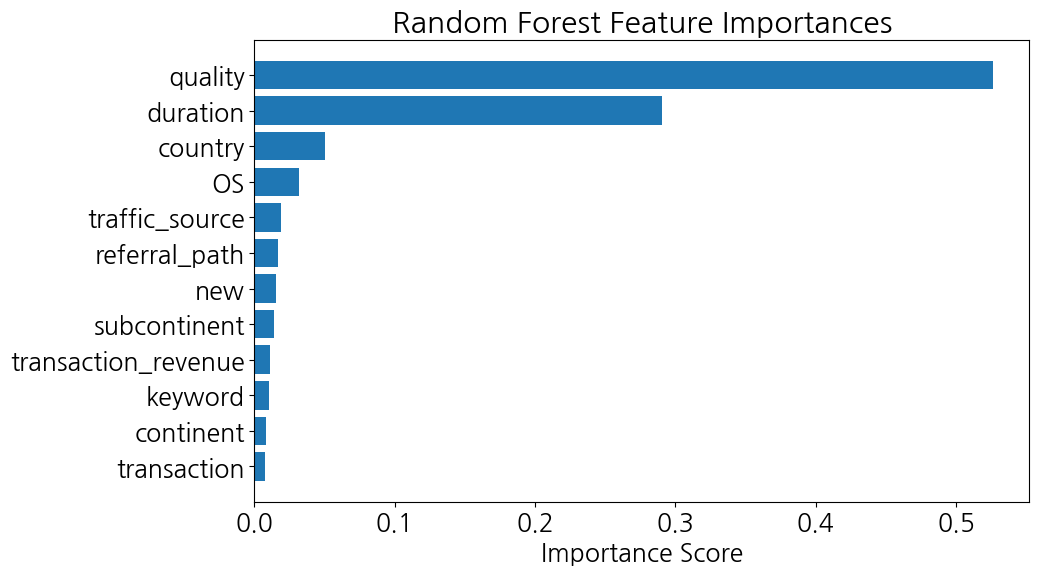

In [55]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.show()

###et

In [70]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [71]:
# Extra Trees
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

In [72]:
#nothing
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}')

Extra Trees Cross-Validation RMSE: 3.0720369078024325
ET test RMSE: 2.9936589320127


In [65]:
# 'device', 'keyword', 'transaction_revenue'
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}')

Extra Trees Cross-Validation RMSE: 3.0557604369617204
ET test RMSE: 3.000601159708342


In [69]:
# 'device', 'keyword', 'transaction_revenue','referral_path'
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}')

Extra Trees Cross-Validation RMSE: 3.0769798471433667
ET test RMSE: 3.037211634429375


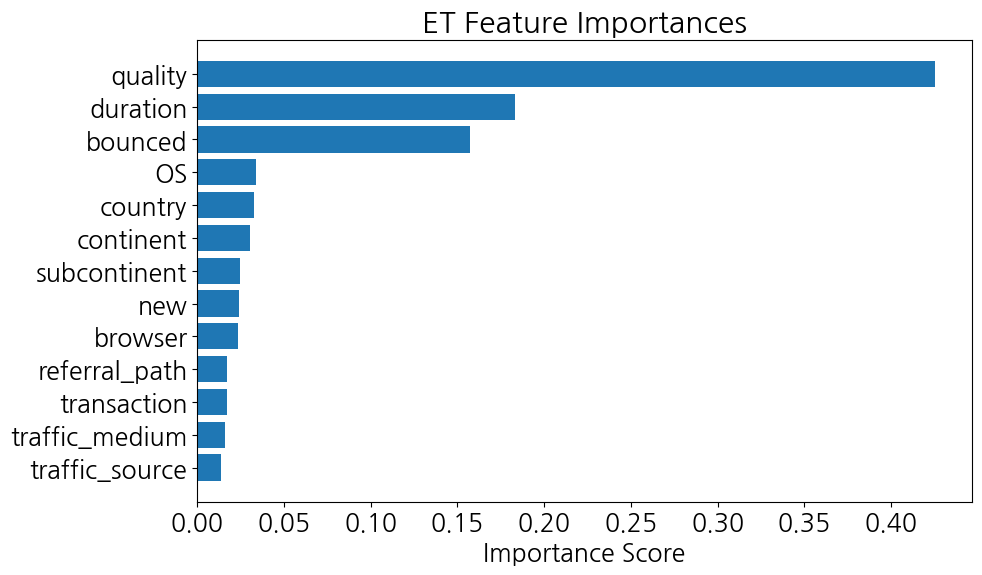

In [66]:
feature_importances = et_model.feature_importances_

feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('ET Feature Importances')
plt.show()

# Blender

In [73]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','device', 'subcontinent', 'keyword'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
#xgb
xgb_model = xgb.XGBRegressor(random_state=41,reg_lambda=4)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

In [ ]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','device', 'keyword', 'transaction_revenue', 'subcontinent'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
#lgb
lgb_model = LGBMRegressor(random_state=41,reg_lambda=4)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
lgb_rmse = rmse_scorer(y_test, lgb_predictions)

In [76]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','browser', 'OS', 'bounced'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
#cat
cat_model = CatBoostRegressor(random_seed=41,l2_leaf_reg=4, verbose=0)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

In [77]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','browser','bounced','device'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
# Random Forest
rf_model = RandomForestRegressor(random_state=41)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)

In [88]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','device', 'keyword', 'transaction_revenue'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
# Extra Trees
et_model = ExtraTreesRegressor(random_state=41)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

In [89]:
xgb_predictions = xgb_model.predict(test.drop(['device', 'subcontinent', 'keyword'],axis=1))
lgb_predictions = lgb_model.predict(test.drop(['device', 'keyword', 'transaction_revenue', 'subcontinent'],axis=1))
cat_predictions = cat_model.predict(test.drop(['browser', 'OS', 'bounced'],axis=1))
rf_predictions = rf_model.predict(test.drop(['browser','bounced','device'],axis=1))
et_predictions = et_model.predict(test.drop(['device', 'keyword','transaction_revenue'],axis=1))

In [90]:
pred = (xgb_predictions + lgb_predictions + cat_predictions + rf_predictions + et_predictions) / 5

In [91]:
pred2 = (xgb_predictions*1.5 + lgb_predictions*1.5 + cat_predictions*1.5 + rf_predictions + et_predictions) / 6.5

In [94]:
sub['TARGET'] = pred
sub.to_csv('blender_5m.csv',index=False)

In [95]:
sub['TARGET'] = pred2
sub.to_csv('blender_5m_Weight.csv',index=False)